# **CS 351L - AI Lab**

## **Instructor: Mr. Usama Arshad, PhD CS**
### **BS Cybersecurity - 5th Semester**

---

### **Welcome to the AI Lab Course!**

In this lab, we will explore various concepts in Artificial Intelligence (AI), focusing on practical implementations using Python. You will work on hands-on exercises and projects that will help you understand AI techniques, algorithms, and tools commonly used in the field of AI and cybersecurity.

### **Course Overview:**
- **Course Code:** CS 351L
- **Program:** BS Cybersecurity
- **Semester:** 5th

---



### **CS 351L - AI Lab - Lab 3**


---

### **Learning Objectives:**

By the end of this lab, students will be able to:

1. **Understand the Concept of CSPs**:
   - Define what a Constraint Satisfaction Problem (CSP) is and explain its significance in problem-solving.

2. **Identify the Components of CSPs**:
   - Recognize and describe the key components of CSPs, including variables, domains, and constraints.

3. **Explore Real-World Examples of CSPs**:
   - Analyze common examples of CSPs such as Sudoku, Map Coloring, and the N-Queens problem, and understand how they are modeled as CSPs.

4. **Implement CSP Solutions Using Backtracking**:
   - Understand and apply the backtracking algorithm to solve CSPs.
   - Recognize how backtracking works and implement it in a practical problem.

5. **Apply Constraint Propagation Techniques**:
   - Learn and implement constraint propagation methods such as Arc Consistency (AC-3) and Forward Checking to optimize CSP solving.

6. **Compare Backtracking and Constraint Propagation**:
   - Evaluate the differences between backtracking and constraint propagation and understand when to use each technique.

7. **Gain Practical Experience in Solving CSPs**:
   - Solve a given CSP problem using backtracking and constraint propagation in a hands-on programming task.

These objectives will help ensure that students not only understand the theory behind CSPs but also gain practical skills in solving them using common AI techniques.


---

### **Let's get started!**

![Alt Text](https://cdn.dribbble.com/users/1523313/screenshots/16134521/media/3975730626bdae63cf9b25d3b634bac3.gif)


# Introduction to Constraint Satisfaction Problems (CSP)

## 1.1 What is a CSP?
A **Constraint Satisfaction Problem (CSP)** is a type of problem where you need to find values for a set of variables, but these variables must satisfy some specific rules or limitations called **constraints**. The goal is to assign values to variables in such a way that all the constraints are respected.

For example, in a puzzle like Sudoku, you are trying to fill numbers into the grid (variables) while making sure no number is repeated in any row, column, or block (constraints).

## 1.2 Components of a CSP (Variables, Domains, Constraints)
A CSP has three main components:

- **Variables**: These are the unknowns we need to solve. For example, in Sudoku, each empty cell is a variable.
  
- **Domains**: This is the set of possible values that can be assigned to each variable. In Sudoku, the domain is the set of numbers from 1 to 9 that can be placed in each cell.

- **Constraints**: These are the rules that limit how the variables can be assigned. For example, in Sudoku, no two cells in the same row, column, or block can have the same number.

## 1.3 Common Examples of CSPs
Here are a few common examples of CSPs:

- **Sudoku**: You have to fill a grid with numbers, making sure no row, column, or block has repeated numbers.
- **Map Coloring**: You need to color regions on a map in such a way that no two adjacent regions have the same color.
- **N-Queens Problem**: You must place N queens on a chessboard so that no two queens threaten each other.

These are examples where you must find solutions that satisfy certain constraints.

## 1.4 Importance of CSPs in Artificial Intelligence
CSPs are very important in the field of **Artificial Intelligence (AI)** because many AI problems can be modeled as CSPs. For example:

- **Scheduling**: Assigning tasks to time slots without conflicts.
- **Planning**: Finding a sequence of actions that lead to a goal.
- **Resource Allocation**: Assigning resources to tasks while respecting constraints like limited availability.

CSPs are widely used because they offer a systematic way to approach problem-solving in AI, allowing machines to find solutions to complex problems efficiently.


# **Map Coloring:**

We use the map coloring problem to demonstrate the CSP. In this problem, the color of nodes in a graph (map) are the variables, the set of available colors for each node constitutes its domain. Two connected nodes are not allowed to have the same color. This is the only constraint in this problem.

In our specific problem we have 9 nodes numbered 0 to 8. The domain for all nodes are the colors {red, green and blue}. The color black represents nodes that have not yet been assigned a color. Even though this problem is a simplified case, the algorithm would remain similar for bigger graphs.

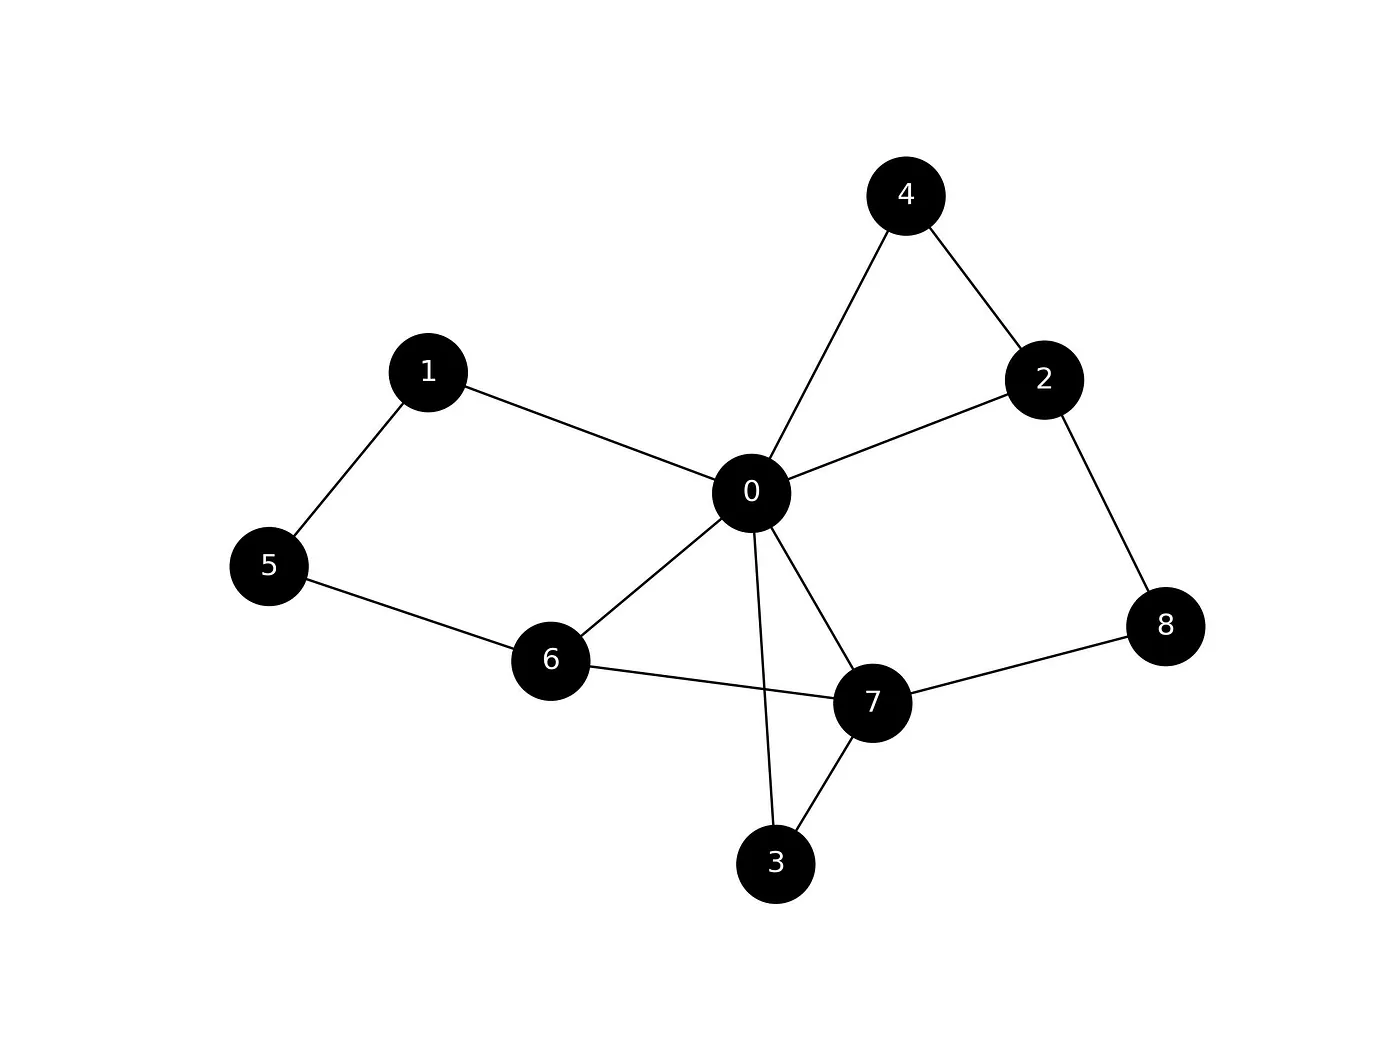

**OUTPUT:**

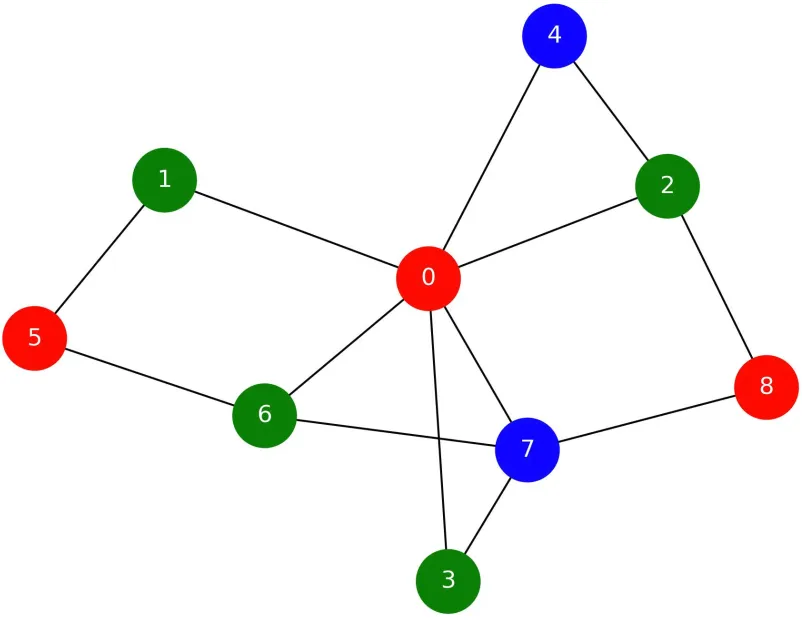

**Failed for 2 colors:**

![Alt Text](https://miro.medium.com/v2/resize:fit:1400/1*UwjrAWzxoQhod3uSBQaUcg.gif)



---



### 2. Solving CSPs Using Backtracking

#### 2.1 Overview of Backtracking Search
**Backtracking** is a common technique used to solve constraint satisfaction problems (CSPs). The idea is to build a solution incrementally, step by step, by assigning values to variables. When a variable is assigned a value, we check if this assignment satisfies the constraints. If it does, we proceed to the next variable. If it doesn't, we backtrack by undoing the assignment and trying a different value. This process continues until a solution is found or all possibilities are exhausted.

- **How it works**:
  - Assign a value to the first variable.
  - Check if the assignment is valid (i.e., it satisfies the constraints).
  - If valid, move to the next variable and repeat.
  - If no valid assignment is possible, backtrack to the previous variable and try a different value.

Backtracking explores all possible combinations of variable assignments, but it can be slow for large problems, which is why optimizations are often applied.

#### 2.2 Basic Backtracking Algorithm

The basic backtracking algorithm follows these steps:

1. **Select an unassigned variable**.
2. **Try assigning a value** from its domain.
3. **Check if the assignment satisfies all constraints**.
   - If it does, continue to the next variable.
   - If it doesn’t, backtrack (undo the assignment and try a different value).
4. **Repeat the process** until:
   - A solution is found, or
   - All values have been tried, meaning no solution exists.

Here’s a step-by-step breakdown of the backtracking process in a CSP:

- **Step 1**: Assign a value to a variable.
- **Step 2**: Check the constraints. If the constraints are satisfied, move forward.
- **Step 3**: If the constraints are violated, undo the last assignment (backtrack) and try a different value.
- **Step 4**: Repeat this process until a complete solution is found, or all options have been exhausted.

#### Example of Basic Backtracking:
For a map coloring problem:
- Start with region A.
- Try assigning the color Red to A.
- If there are no conflicts with other assigned regions, assign a color to the next region.
- If a conflict occurs, try another color or backtrack to the previous region.

**Python pseudocode** for backtracking:

```python
def backtrack(assignment):
    if assignment is complete:
        return assignment
    
    variable = select_unassigned_variable()
    
    for value in domain(variable):
        if is_consistent(value, assignment):
            assignment[variable] = value
            result = backtrack(assignment)
            if result:
                return result
            del assignment[variable]  # Backtrack if solution not found
    
    return None  # No solution
```

#### 2.3 Heuristics for Improving Backtracking (MRV, Degree Heuristic)

While backtracking can solve CSPs, it can be slow. **Heuristics** are strategies that can improve the efficiency of the backtracking process by reducing the search space.

1. **Minimum Remaining Values (MRV)**:
   - The MRV heuristic, also called the **most constrained variable** heuristic, selects the variable that has the fewest remaining legal values. The idea is that the variable most likely to cause a failure is processed first, so that backtracking occurs early, saving time.
   - **How it works**: When choosing the next variable to assign, pick the one with the smallest number of allowable values left (smallest domain).

   Example: In a Sudoku puzzle, if one cell has only one possible value, it should be filled in before cells with more possible values.

2. **Degree Heuristic**:
   - The degree heuristic chooses the variable that is involved in the largest number of constraints with other unassigned variables. This helps in reducing future conflicts.
   - **How it works**: When multiple variables have the same MRV (same number of possible values), select the variable that is involved in the most constraints with unassigned variables.

   Example: In the map coloring problem, if multiple regions are equally constrained, pick the region with the most neighbors (the highest degree).

**Combining Heuristics**: Often, MRV is applied first to choose the most constrained variable. If there is a tie, the degree heuristic is applied to break the tie by selecting the variable with the most constraints.

These heuristics greatly reduce the number of assignments that need to be tried, making the backtracking algorithm much more efficient.

### Summary:
- **Backtracking** is a recursive approach that tries to assign values to variables incrementally, checking constraints at each step.
- **MRV** helps pick the most constrained variable (smallest domain), and the **degree heuristic** picks the variable with the most constraints to resolve conflicts early.
- These techniques are used to speed up the search for a solution by minimizing unnecessary backtracking.

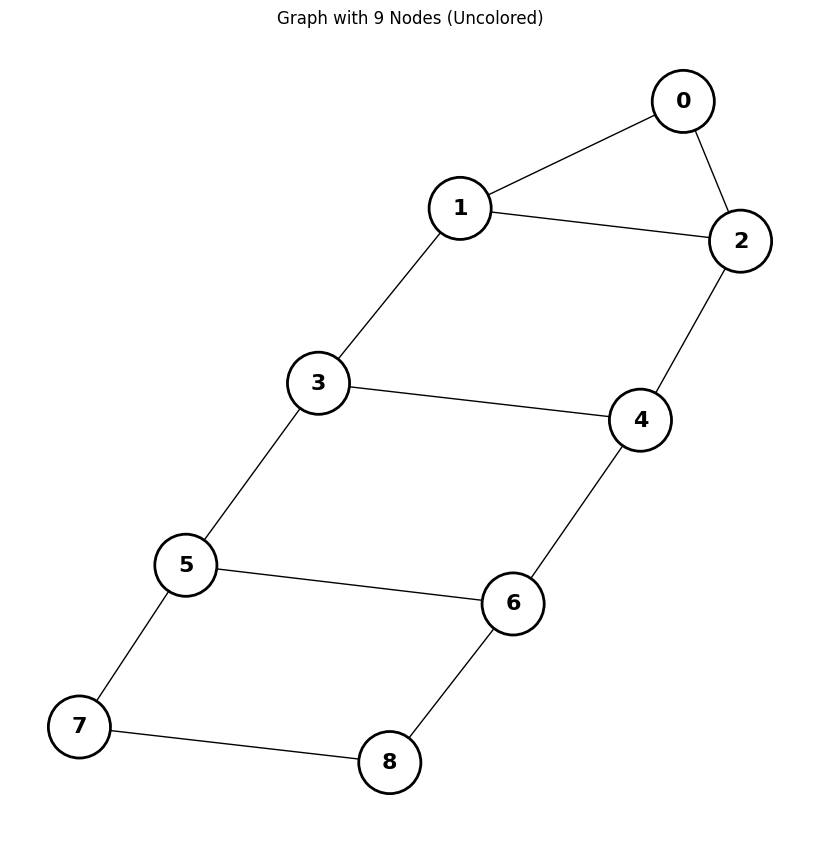

In [ ]:
# Install necessary libraries (if needed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph with 9 vertices (0 to 8) and edges (connections)
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6), (5, 6), (5, 7), (6, 8), (7, 8)]
G.add_edges_from(edges)

# Step 2: Visualize the graph without any colors (uncolored state)
def visualize_uncolored_graph():
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing
    # Nodes are all colored white (uncolored)
    node_colors = ['#ffffff'] * len(G.nodes)  # White color for nodes
    edge_colors = 'black'  # Black edges
    node_border_color = 'black'  # Black border for node circles

    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color=edge_colors,
            linewidths=2, node_shape='o',  # 'o' for circular nodes
            edgecolors=node_border_color)  # Set the border color of the nodes

    plt.title("Graph with 9 Nodes (Uncolored)")
    plt.show()

# Step 3: Display the graph
visualize_uncolored_graph()


Step 1: Node 0 colored Red


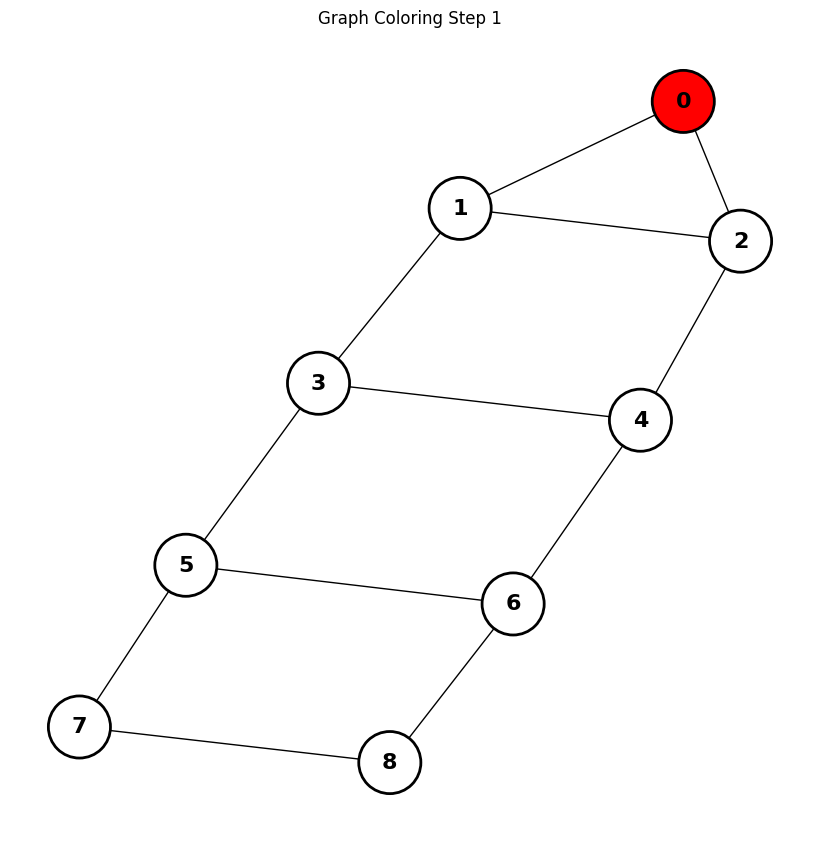

Step 2: Node 1 colored Green


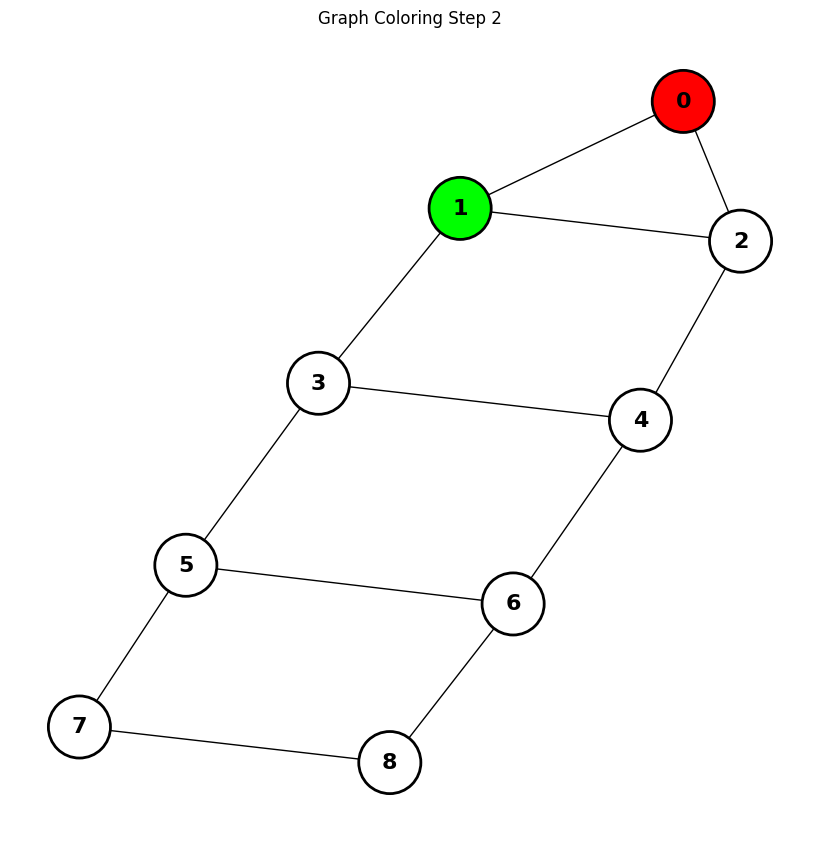

Step 3: Node 2 colored Blue


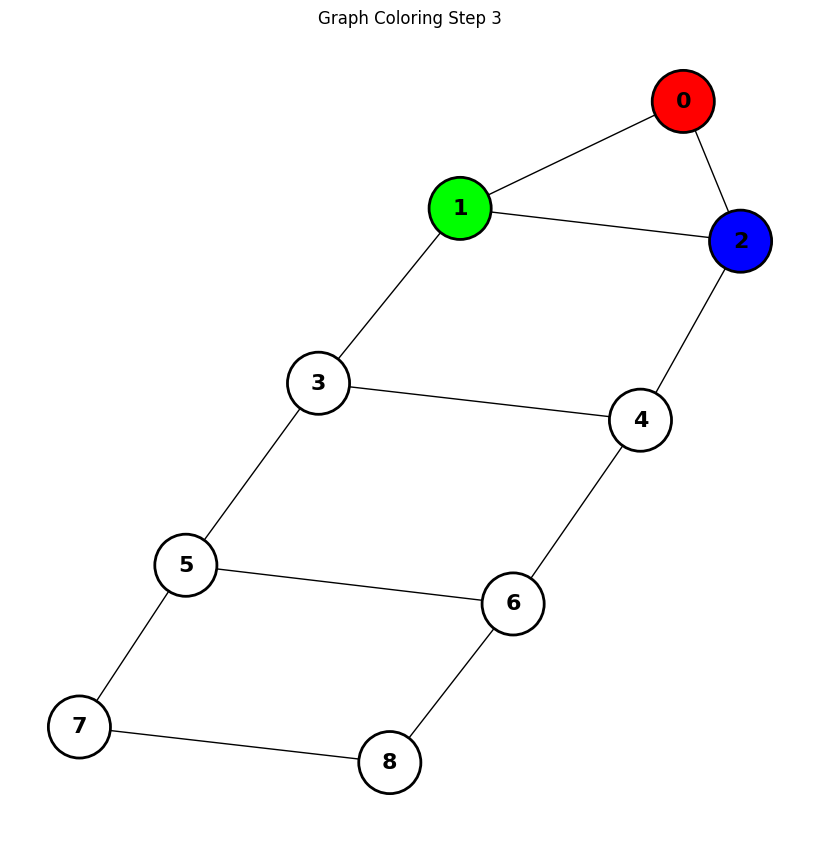

Step 4: Node 3 colored Red


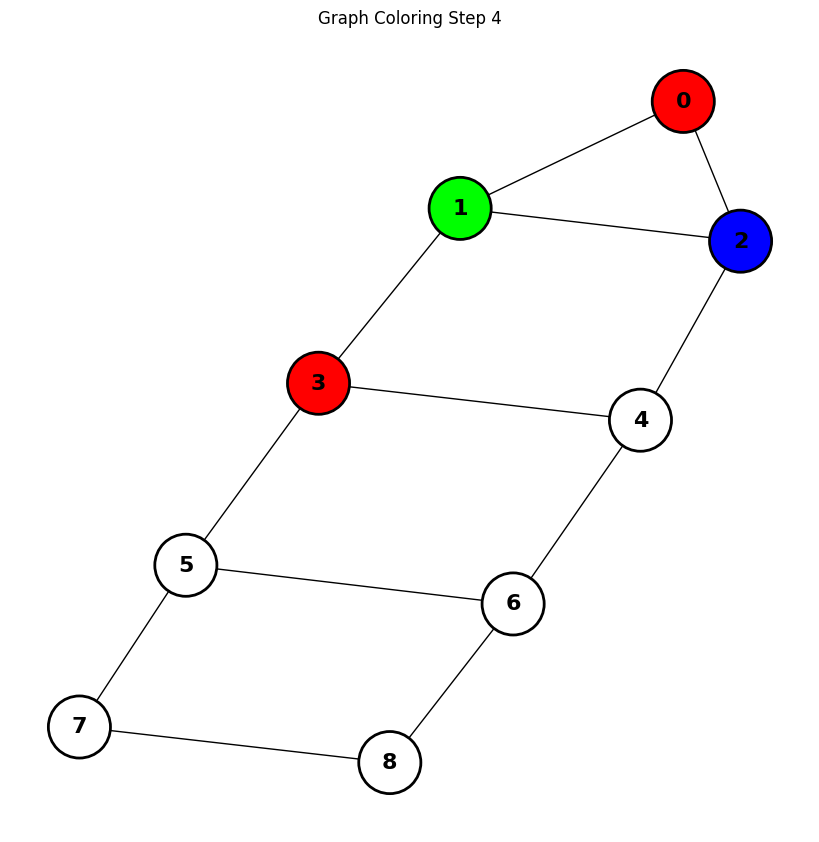

Step 5: Node 4 colored Green


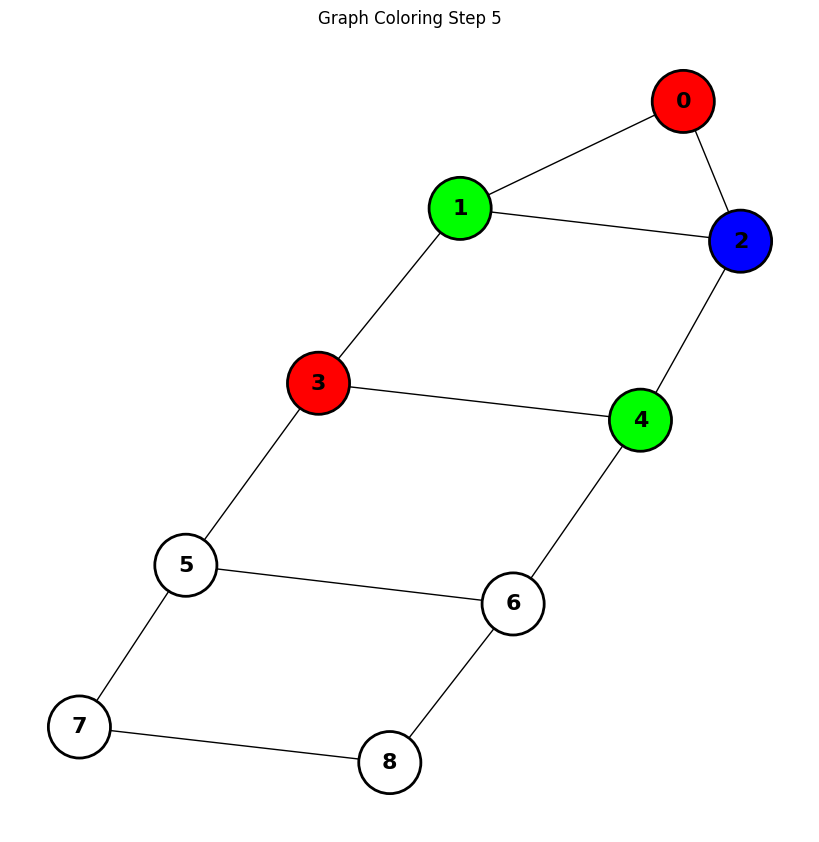

Step 6: Node 5 colored Green


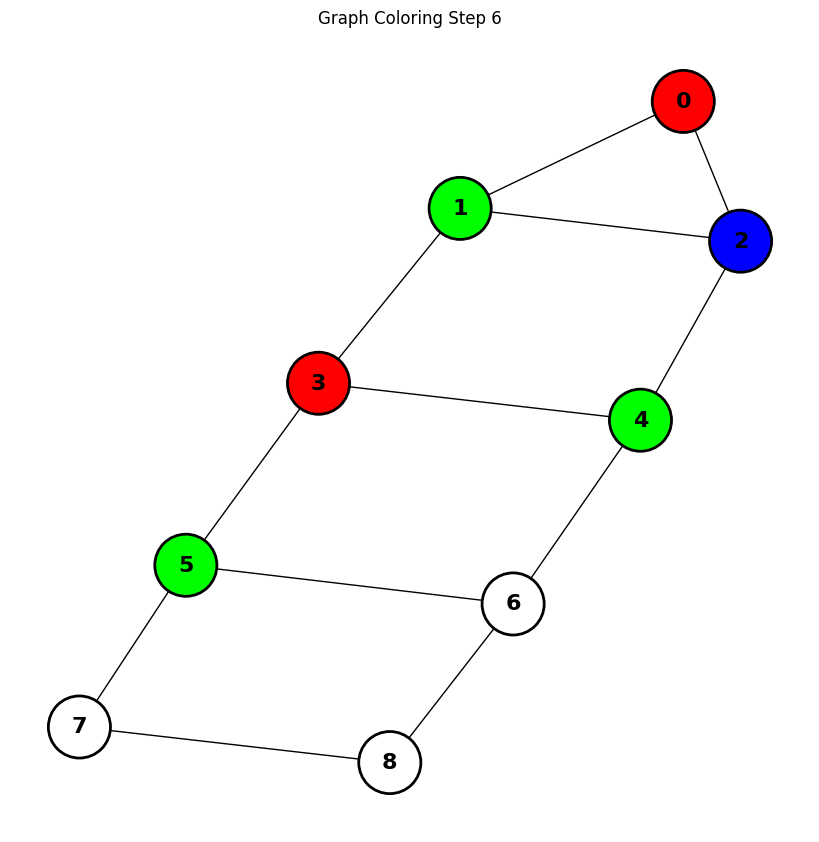

Step 7: Node 6 colored Red


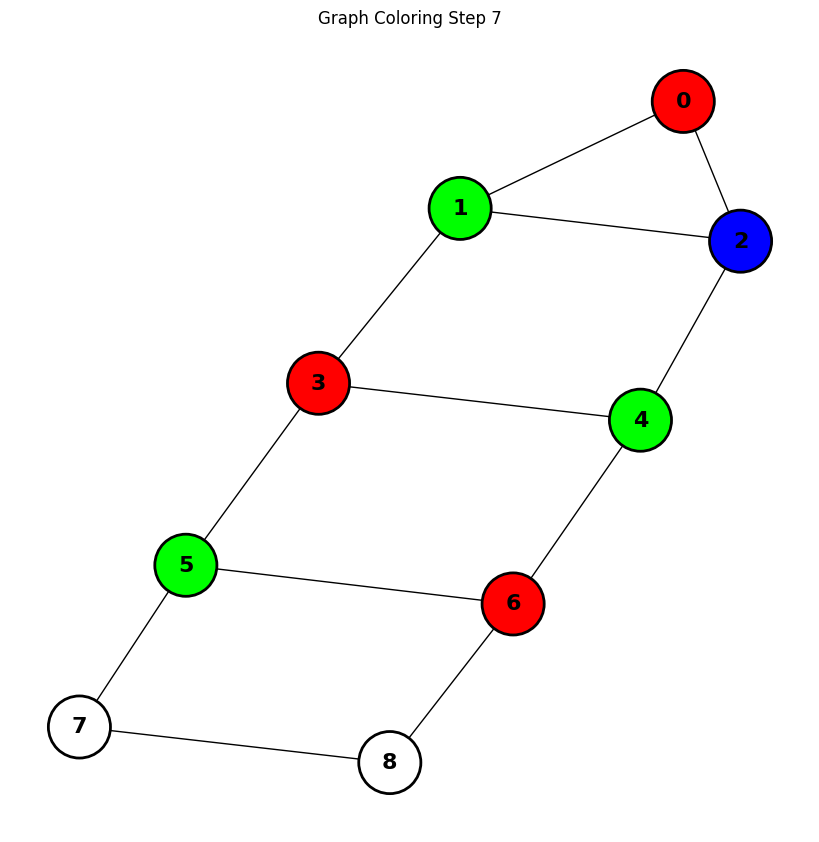

Step 8: Node 7 colored Red


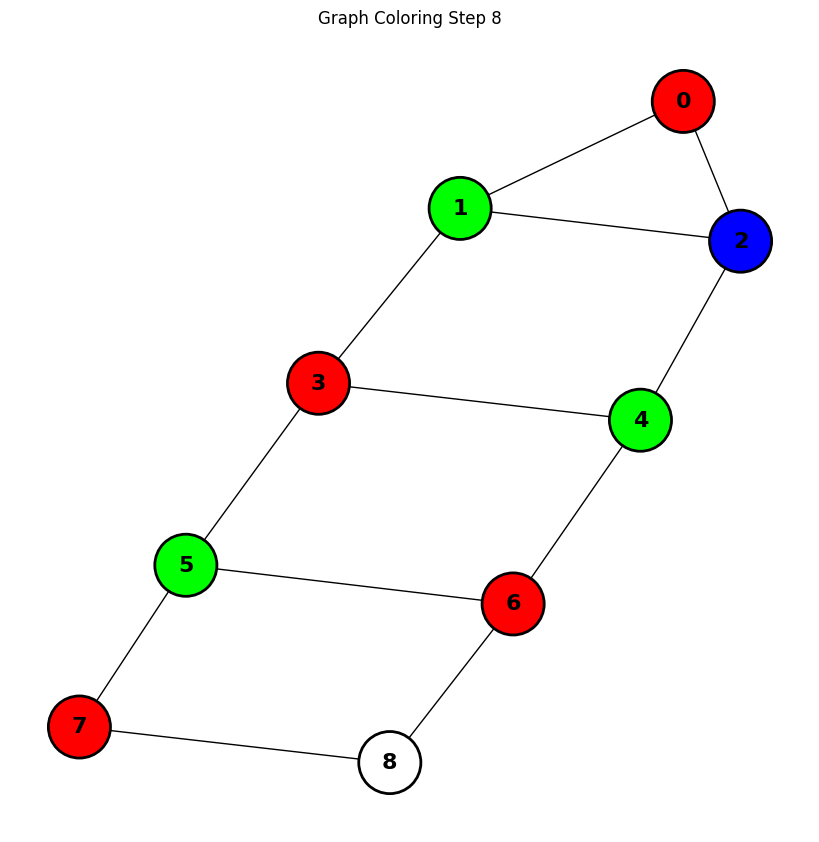

Step 9: Node 8 colored Green


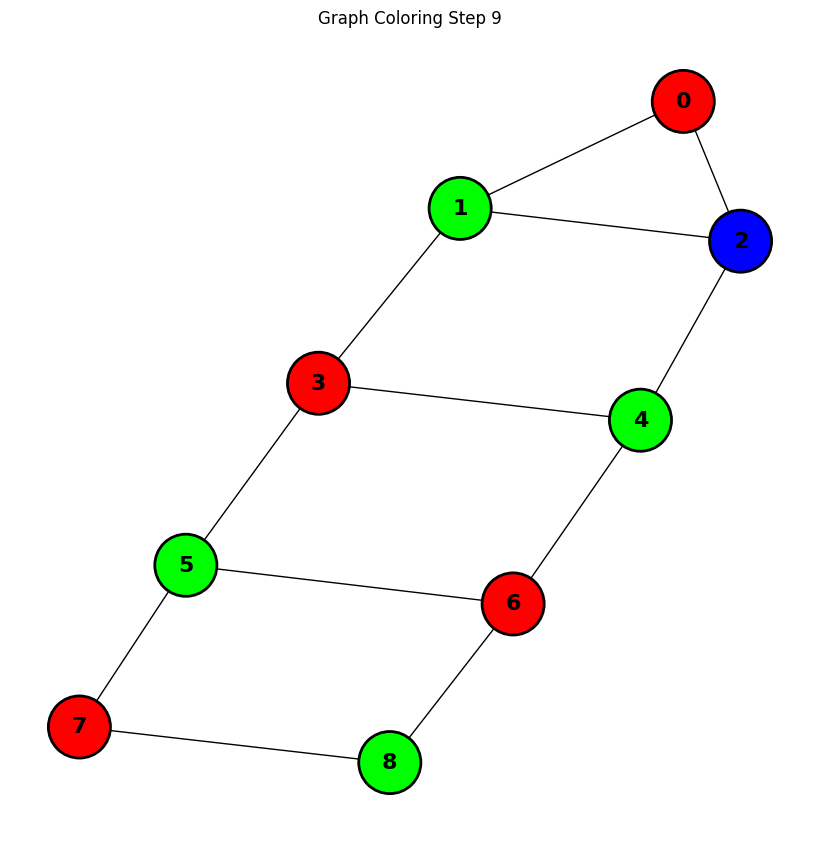

Final Assignment: {0: 'Red', 1: 'Green', 2: 'Blue', 3: 'Red', 4: 'Green', 5: 'Green', 6: 'Red', 7: 'Red', 8: 'Green'}


In [ ]:
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph with 9 vertices and the edges (connections)
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6), (5, 6), (5, 7), (6, 8), (7, 8)]
G.add_edges_from(edges)

# Step 2: Define the available colors
colors = ['Red', 'Green', 'Blue']

# Step 3: Function to visualize the graph coloring step by step
def visualize_graph(assignment, step):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        if color == 'Red':
            node_colors[node] = '#FF0000'
        elif color == 'Green':
            node_colors[node] = '#00FF00'
        elif color == 'Blue':
            node_colors[node] = '#0000FF'

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Graph Coloring Step {step}")
    plt.show()

# Step 4: Function to check if a color assignment is valid
def is_valid_color(node, color, assignment):
    # Check all neighboring nodes to ensure no conflict (no neighbor has the same color)
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Function to color the graph with conflict checking (sequential assignment)
def color_graph_with_conflict_checking():
    assignment = {}  # Dictionary to store node-color assignment
    node_list = list(G.nodes)  # Get the list of nodes in the graph

    # Step through each node and assign colors while checking for conflicts
    for i, node in enumerate(node_list):
        for color in colors:
            if is_valid_color(node, color, assignment):
                assignment[node] = color  # Assign the color
                print(f"=======================================")
                print(f"Step {i+1}: Node {node} colored {color}")
                print(f"=======================================")
                visualize_graph(assignment, i+1)  # Visualize the graph at each step
                break  # Move to the next node once a valid color is found

    return assignment

# Step 6: Color the graph and display the process step by step
final_assignment = color_graph_with_conflict_checking()

print("Final Assignment:", final_assignment)


**Graph Coloring with Backtracking and Heuristics**

Choose a heuristic:
1. Minimum Remaining Values (MRV)
2. Degree Heuristic
Enter 1 or 2: 1


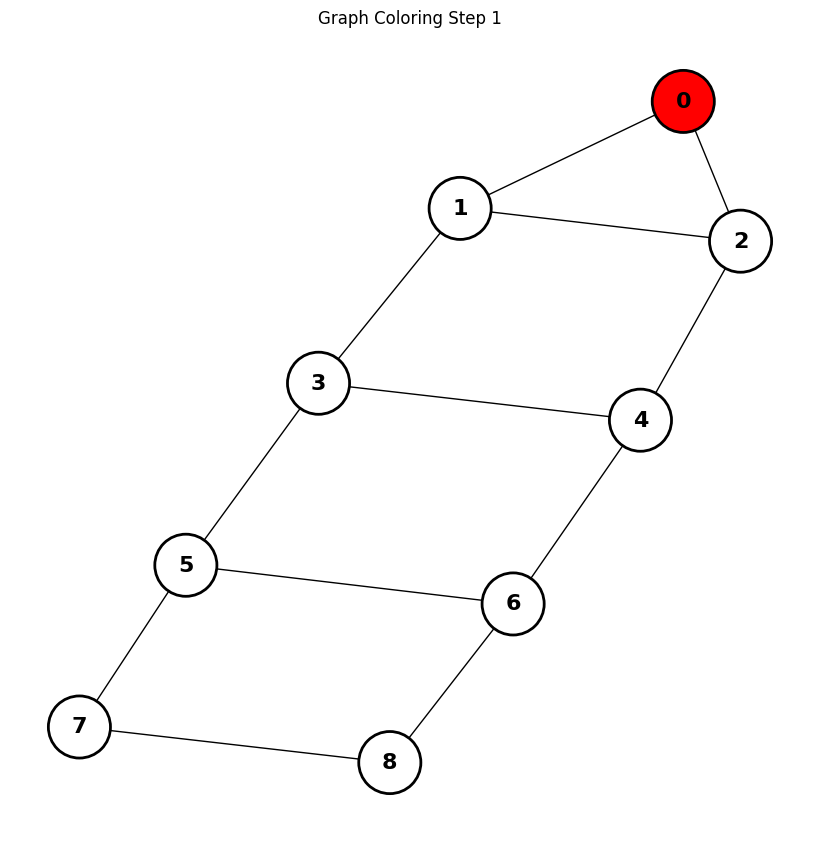

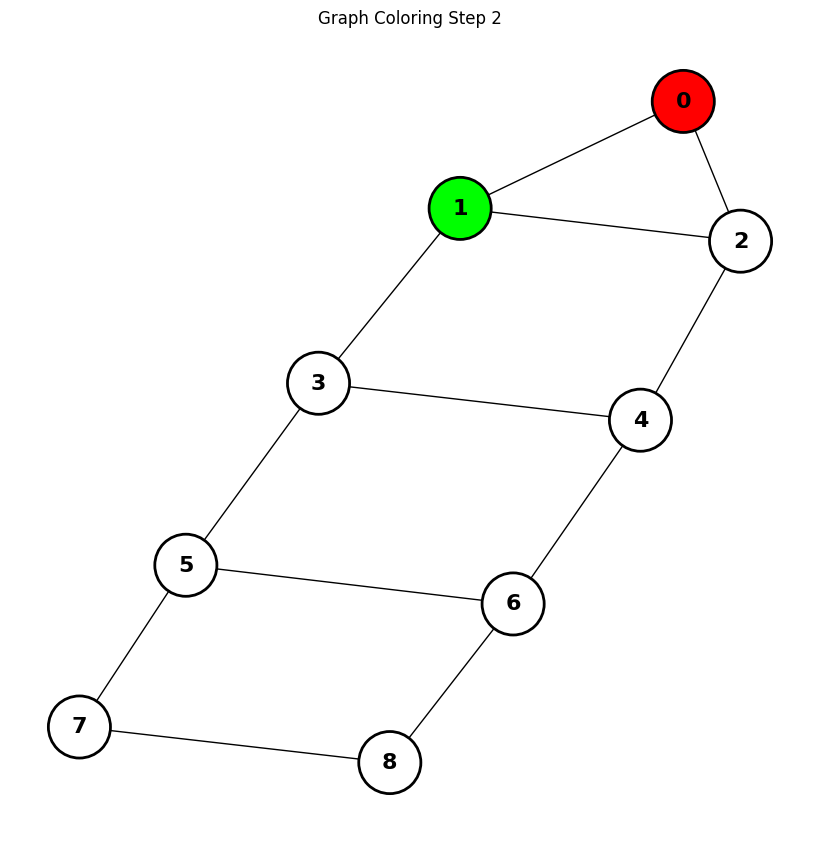

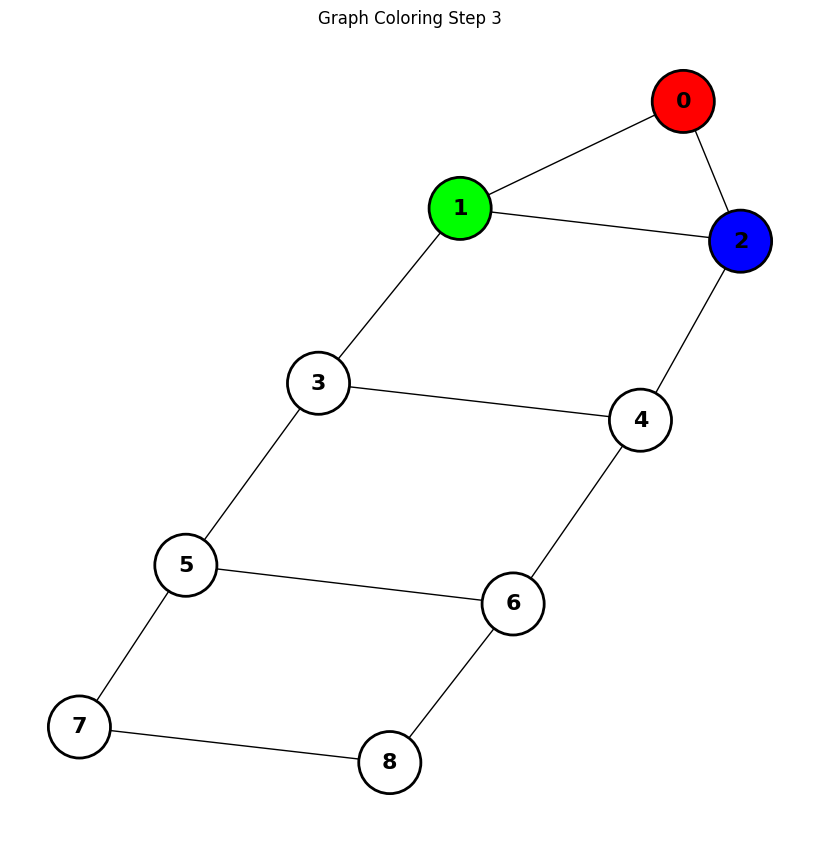

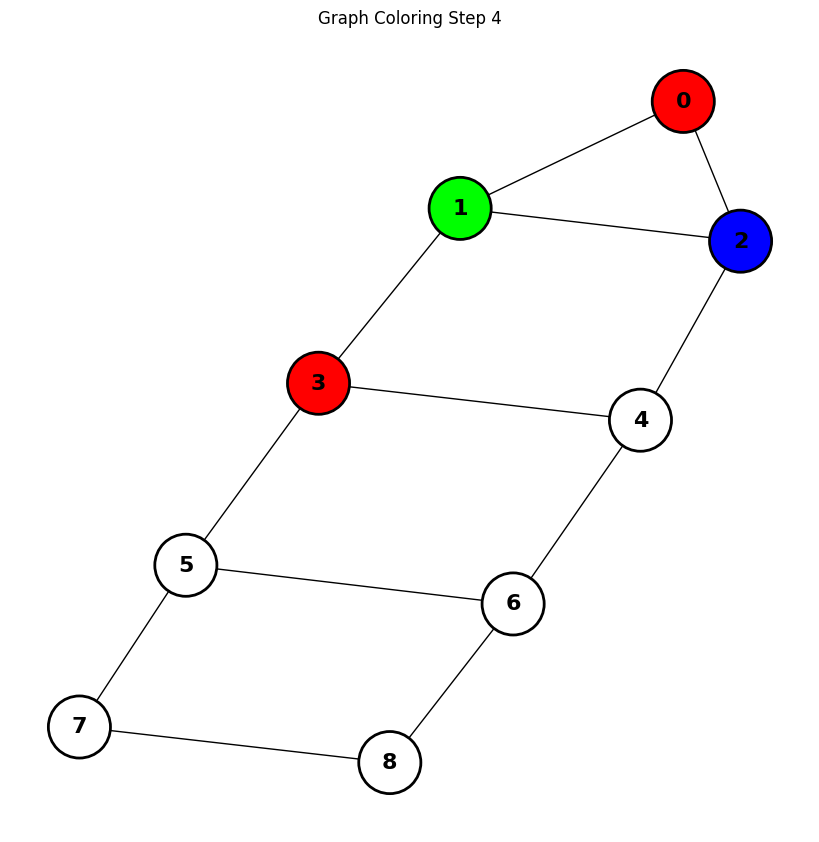

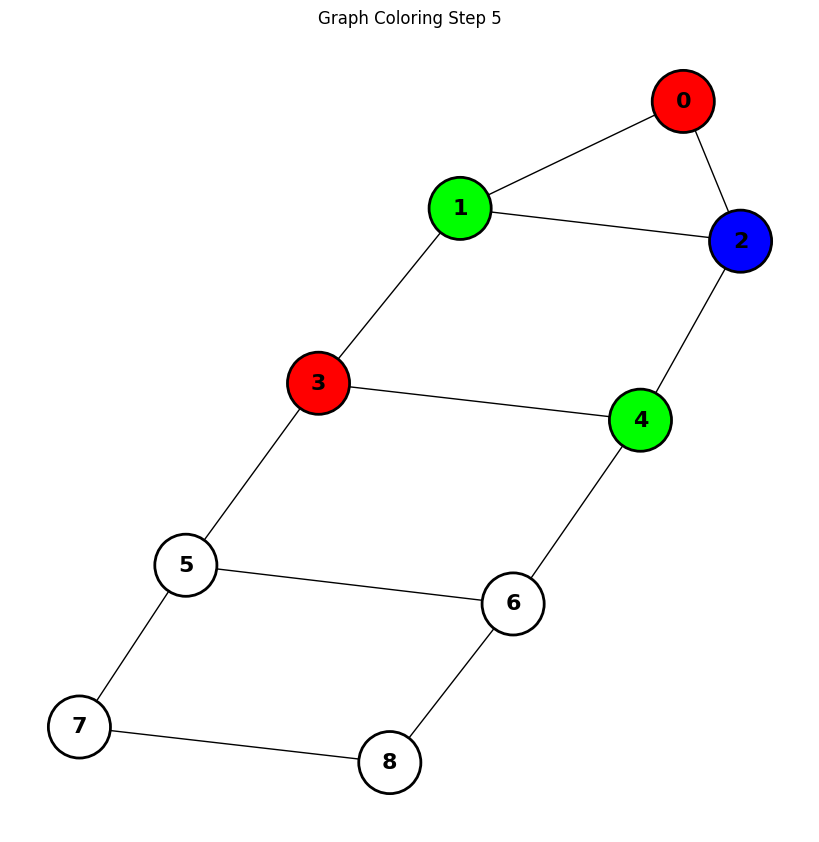

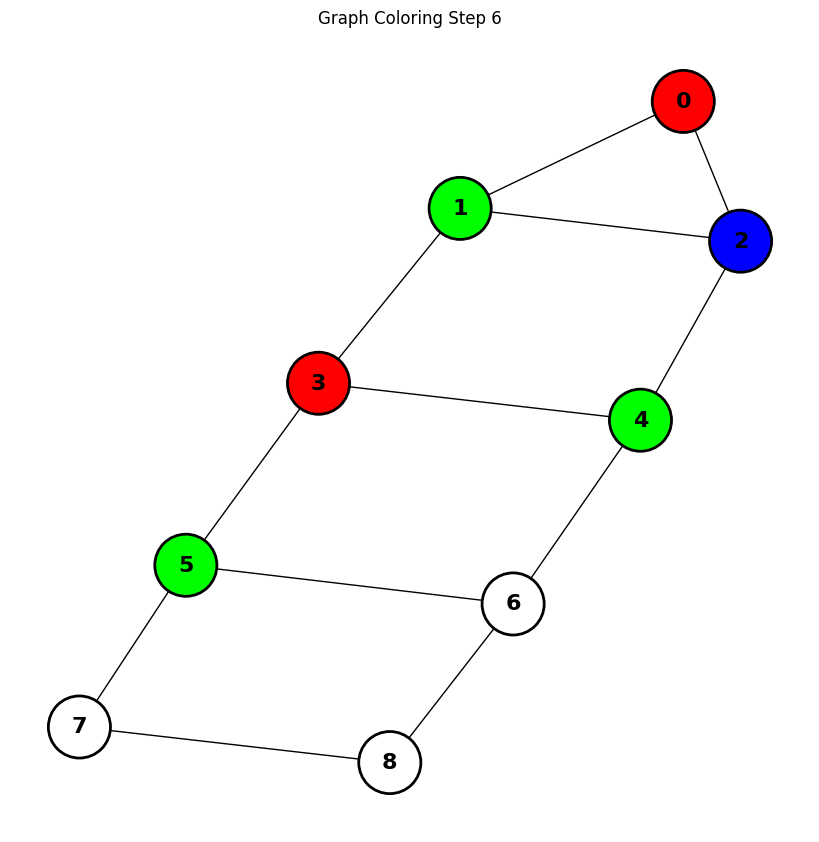

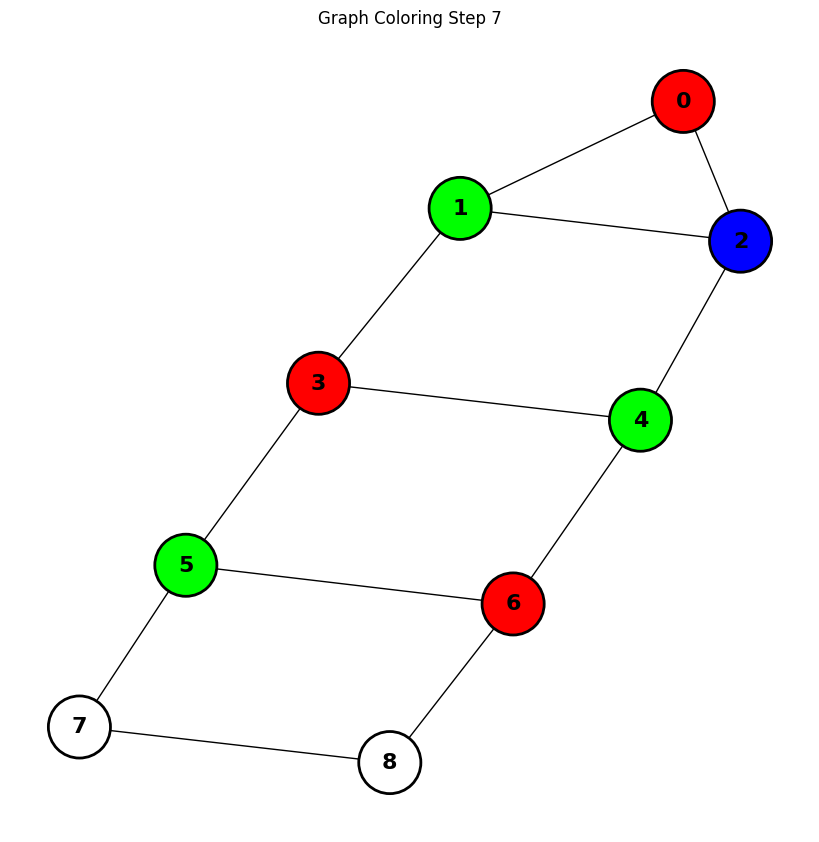

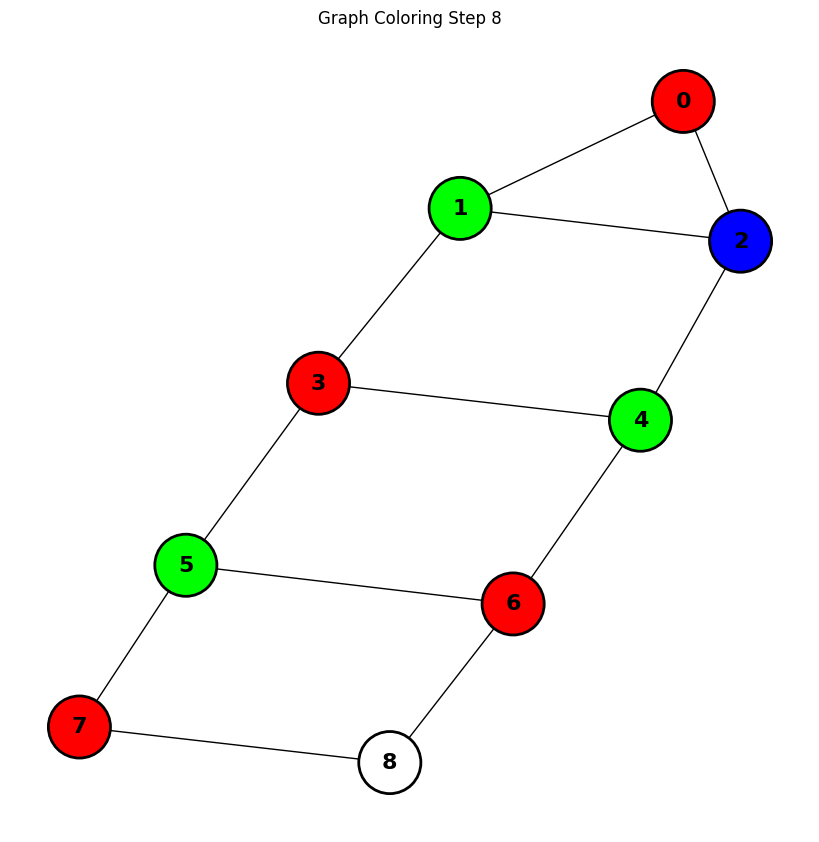

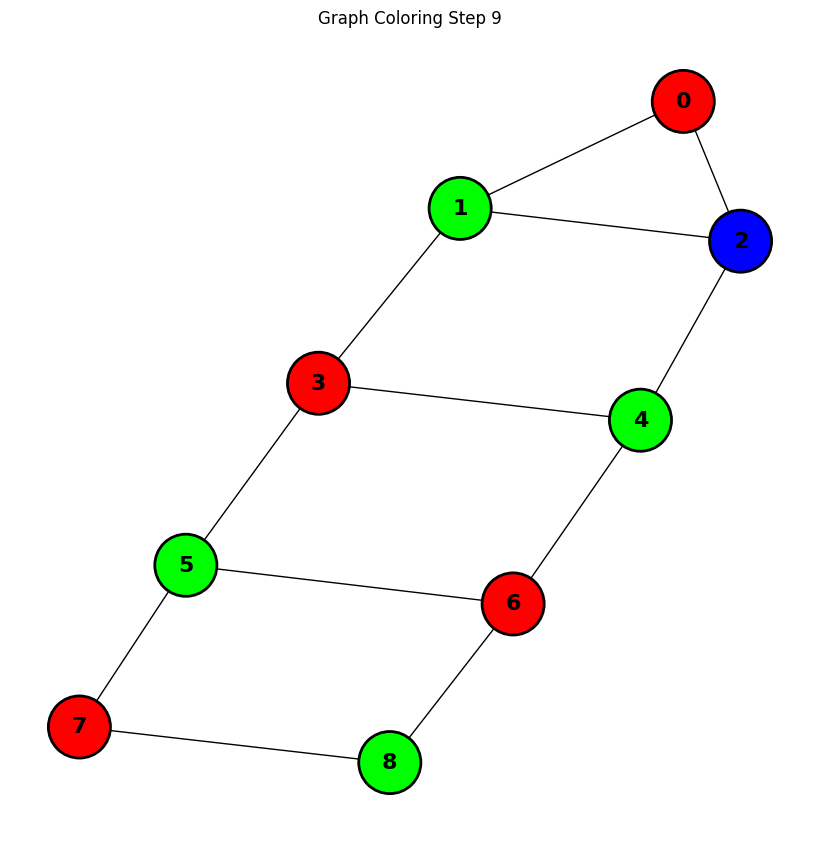

Final Assignment: {0: 'Red', 1: 'Green', 2: 'Blue', 3: 'Red', 4: 'Green', 5: 'Green', 6: 'Red', 7: 'Red', 8: 'Green'}


In [ ]:
# Install necessary libraries (if needed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph with 9 vertices and the edges (connections)
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6), (5, 6), (5, 7), (6, 8), (7, 8)]
G.add_edges_from(edges)

# Step 2: Define the available colors
colors = ['Red', 'Green', 'Blue']

# Step 3: Visualize the graph coloring step by step
def visualize_graph(assignment, step):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        if color == 'Red':
            node_colors[node] = '#FF0000'
        elif color == 'Green':
            node_colors[node] = '#00FF00'
        elif color == 'Blue':
            node_colors[node] = '#0000FF'

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Graph Coloring Step {step}")
    plt.show()

# Step 4: Function to check if a color assignment is valid
def is_valid_color(node, color, assignment):
    # Check all neighboring nodes to ensure no conflict (no neighbor has the same color)
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # For each unassigned node, count the number of legal values
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_color(node, color, assignment) for color in colors)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # Select the node with the highest number of uncolored neighbors (degree)
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with MRV and Degree Heuristic
def backtracking_with_heuristics(assignment, heuristic, step):
    if len(assignment) == len(G.nodes):
        return assignment  # All nodes are colored

    # Choose the next node to assign a color using the chosen heuristic
    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(assignment)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(assignment)
    else:
        node = list(G.nodes)[len(assignment)]  # Fallback, default to a sequential assignment

    for color in colors:
        if is_valid_color(node, color, assignment):
            assignment[node] = color  # Assign the color
            visualize_graph(assignment, step)  # Visualize the current step
            result = backtracking_with_heuristics(assignment, heuristic, step+1)
            if result:
                return result  # Return if a valid coloring is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Function to let user choose between MRV and Degree Heuristic
def color_graph_with_backtracking():
    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    if choice == '1':
        heuristic = 'MRV'
    elif choice == '2':
        heuristic = 'Degree'
    else:
        print("Invalid choice. Defaulting to sequential assignment.")
        heuristic = None

    final_assignment = backtracking_with_heuristics({}, heuristic, 1)
    print("Final Assignment:", final_assignment)

# Step 9: Run the graph coloring with backtracking and heuristic of choice
color_graph_with_backtracking()


Choose a heuristic:
1. Minimum Remaining Values (MRV)
2. Degree Heuristic
Enter 1 or 2: 2


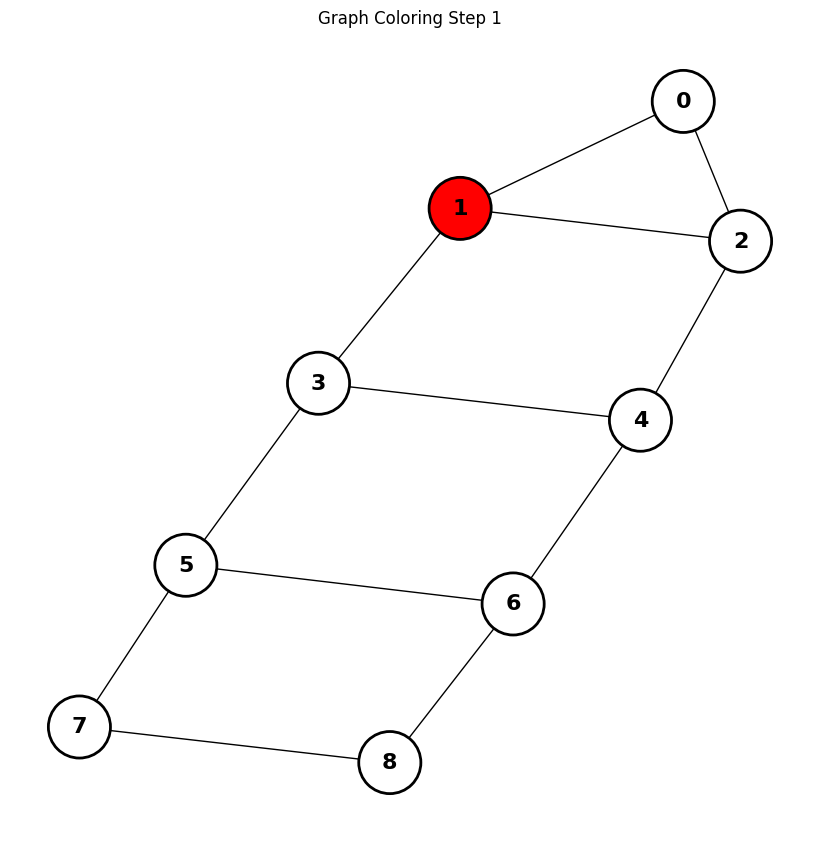

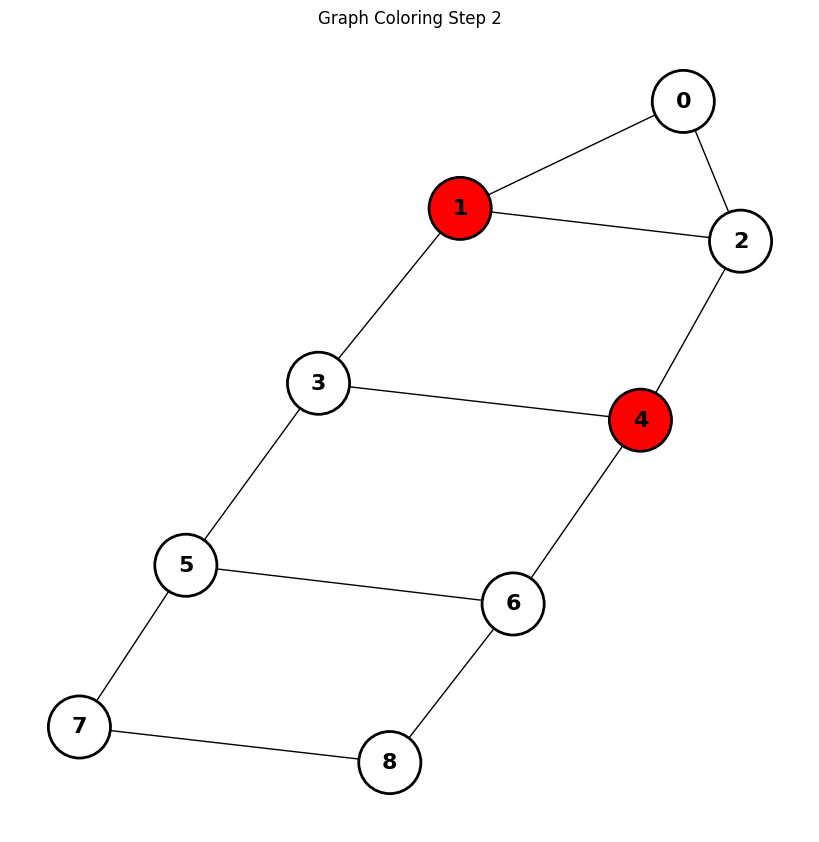

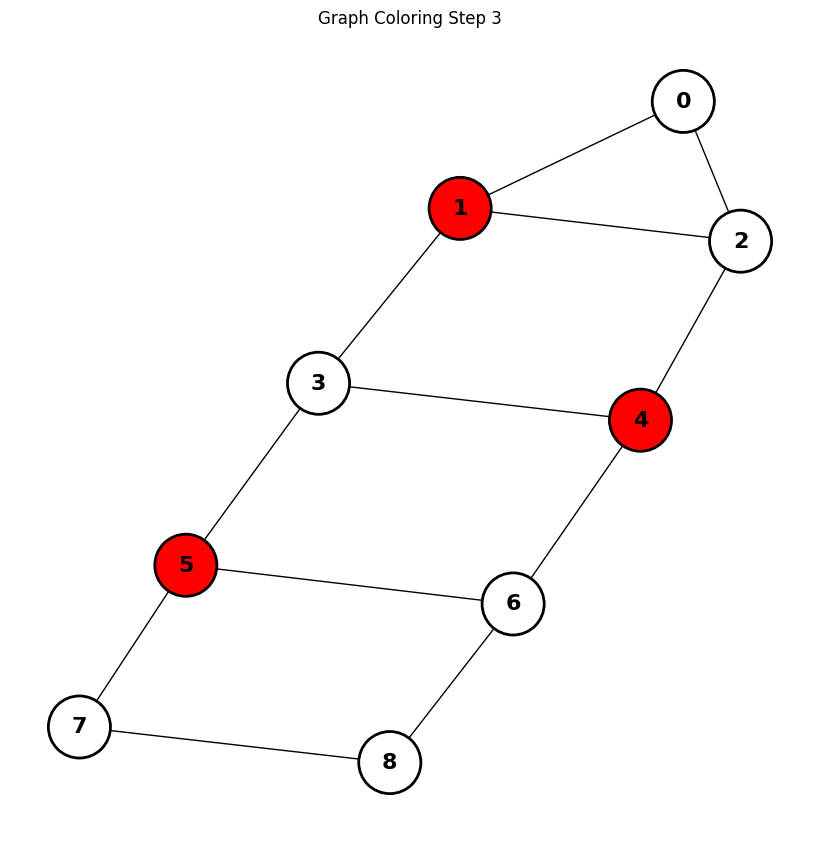

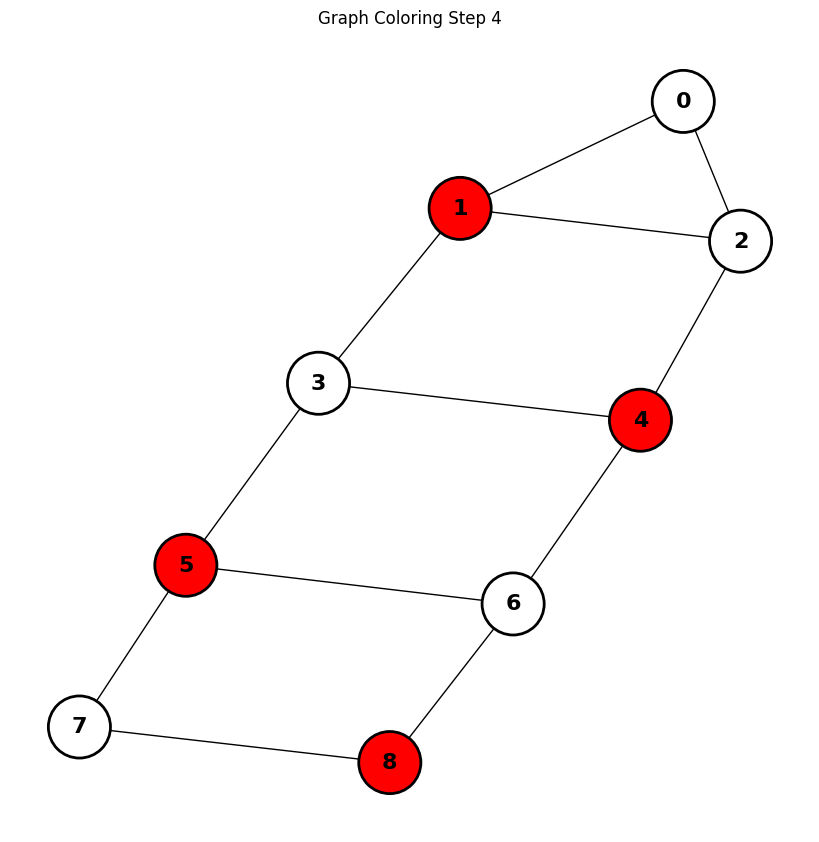

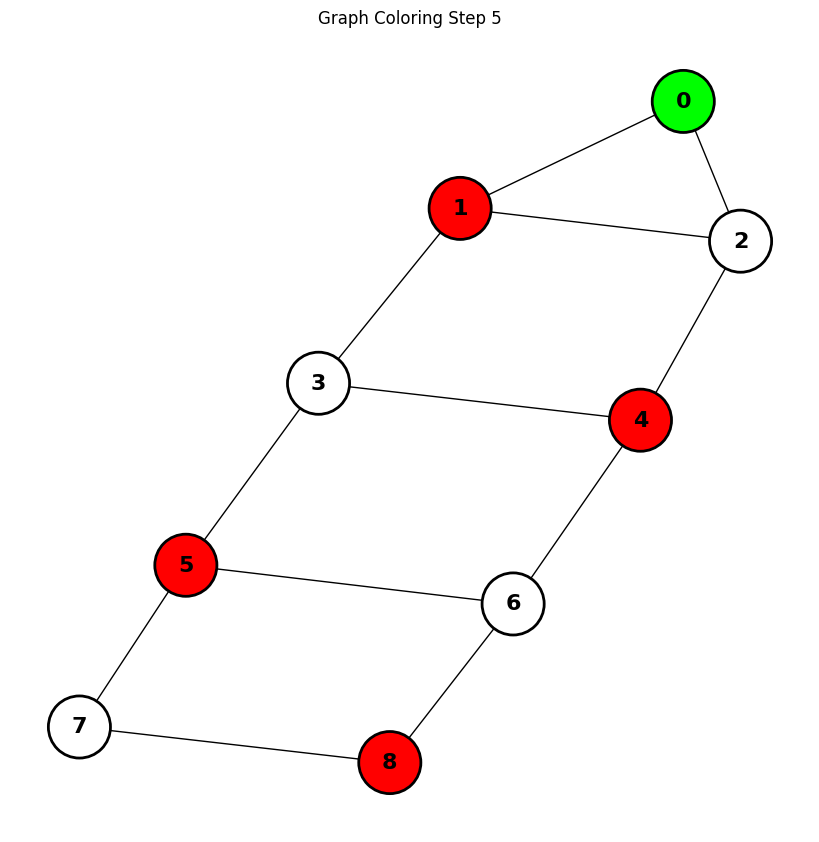

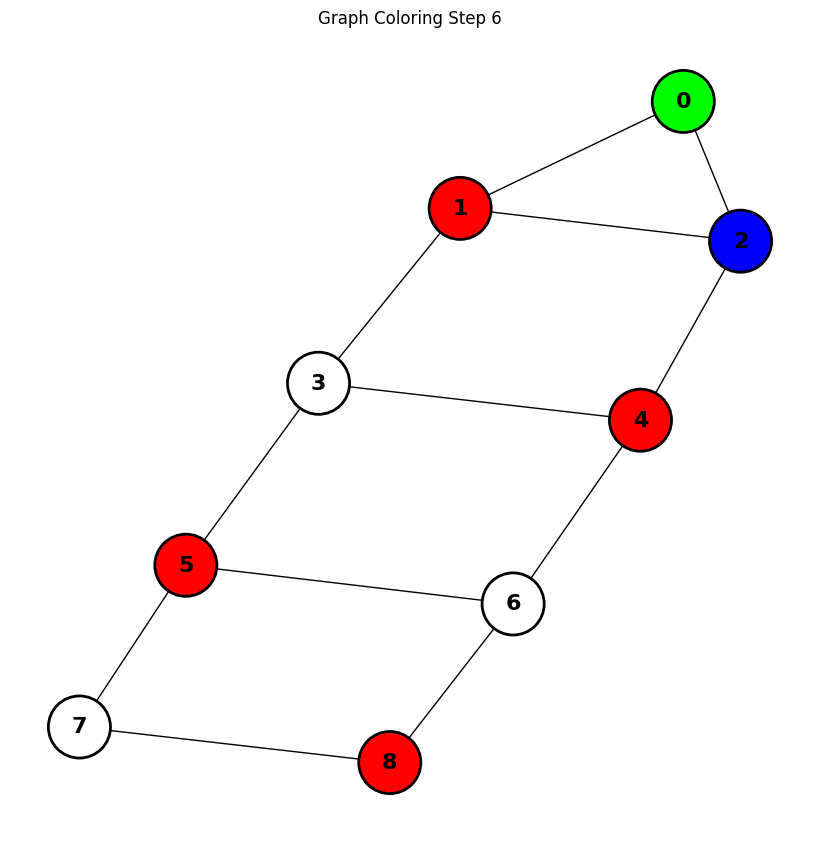

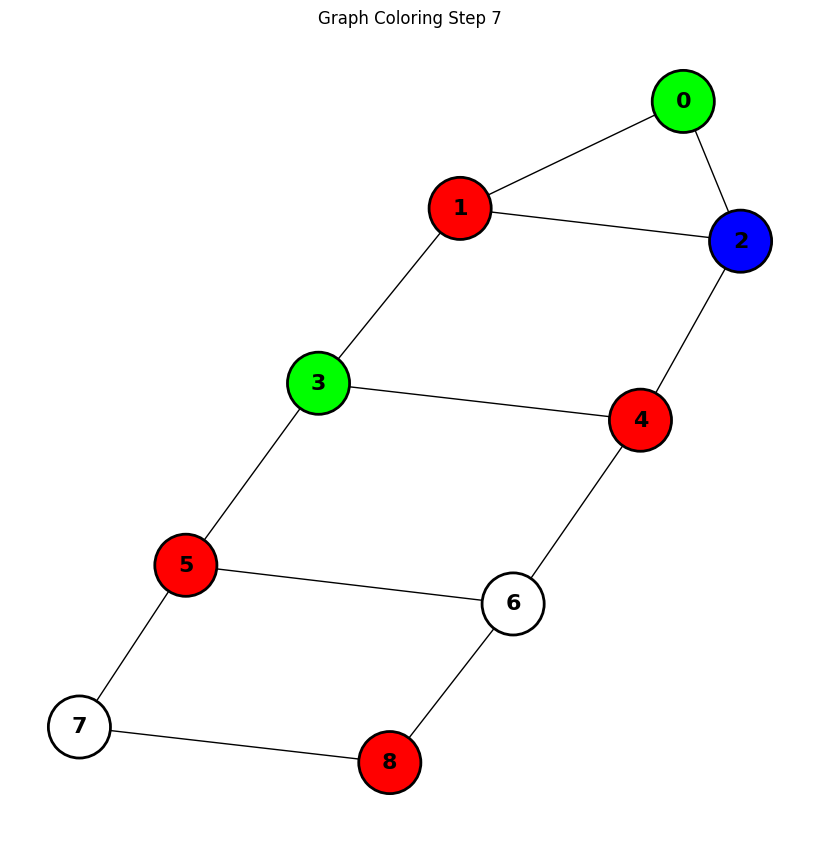

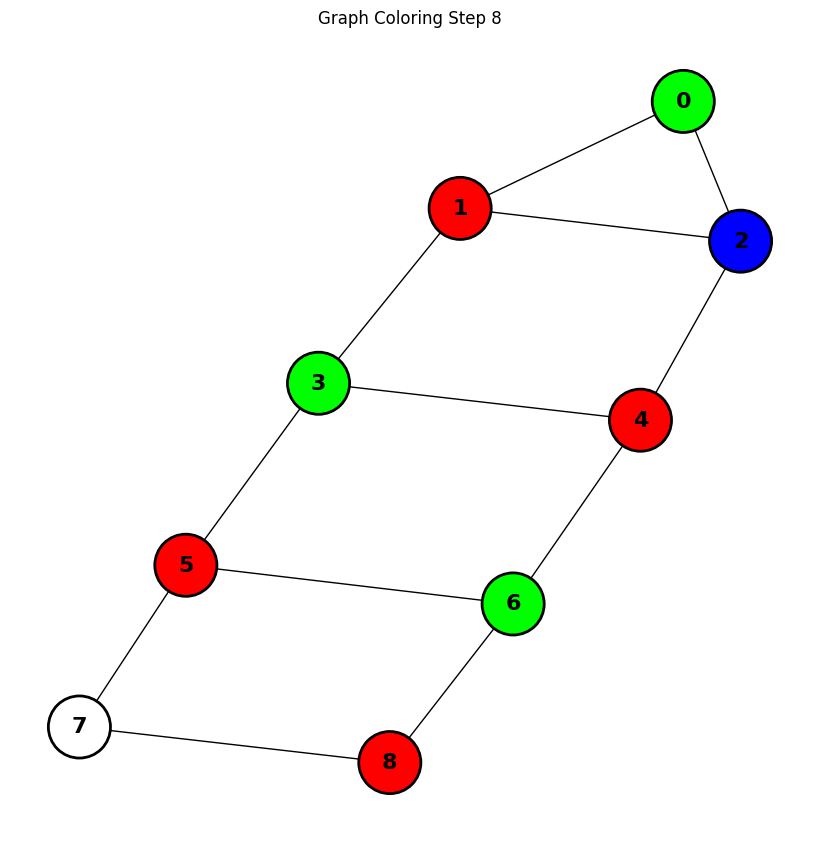

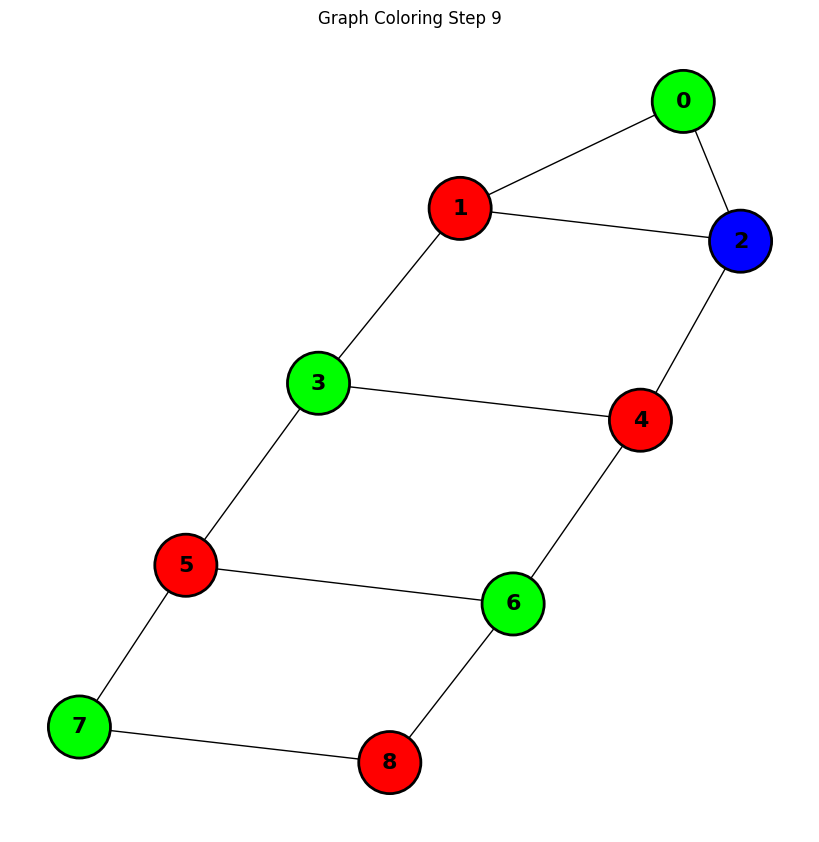

Final Assignment: {1: 'Red', 4: 'Red', 5: 'Red', 8: 'Red', 0: 'Green', 2: 'Blue', 3: 'Green', 6: 'Green', 7: 'Green'}


In [ ]:
# Install necessary libraries (if needed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph with 9 vertices and the edges (connections)
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6), (5, 6), (5, 7), (6, 8), (7, 8)]
G.add_edges_from(edges)

# Step 2: Define the available colors
colors = ['Red', 'Green', 'Blue']

# Step 3: Visualize the graph coloring step by step
def visualize_graph(assignment, step):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        if color == 'Red':
            node_colors[node] = '#FF0000'
        elif color == 'Green':
            node_colors[node] = '#00FF00'
        elif color == 'Blue':
            node_colors[node] = '#0000FF'

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Graph Coloring Step {step}")
    plt.show()

# Step 4: Function to check if a color assignment is valid
def is_valid_color(node, color, assignment):
    # Check all neighboring nodes to ensure no conflict (no neighbor has the same color)
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # For each unassigned node, count the number of legal values
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_color(node, color, assignment) for color in colors)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # Select the node with the highest number of uncolored neighbors (degree)
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with MRV and Degree Heuristic
def backtracking_with_heuristics(assignment, heuristic, step):
    if len(assignment) == len(G.nodes):
        return assignment  # All nodes are colored

    # Choose the next node to assign a color using the chosen heuristic
    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(assignment)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(assignment)
    else:
        node = list(G.nodes)[len(assignment)]  # Fallback, default to a sequential assignment

    for color in colors:
        if is_valid_color(node, color, assignment):
            assignment[node] = color  # Assign the color
            visualize_graph(assignment, step)  # Visualize the current step
            result = backtracking_with_heuristics(assignment, heuristic, step+1)
            if result:
                return result  # Return if a valid coloring is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Function to let user choose between MRV and Degree Heuristic
def color_graph_with_backtracking():
    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    if choice == '1':
        heuristic = 'MRV'
    elif choice == '2':
        heuristic = 'Degree'
    else:
        print("Invalid choice. Defaulting to sequential assignment.")
        heuristic = None

    final_assignment = backtracking_with_heuristics({}, heuristic, 1)
    print("Final Assignment:", final_assignment)

# Step 9: Run the graph coloring with backtracking and heuristic of choice
color_graph_with_backtracking()


# **Final Graph Coloring Code**

In [ ]:
# Install necessary libraries (if needed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Automatically generate a set of colors based on the number of nodes
def generate_colors(num_nodes):
    color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800080', '#FFA500', '#00FF7F']
    return color_list[:min(num_nodes, len(color_list))]

# Step 2: Function to create a random graph with the specified number of nodes
def create_random_graph(num_nodes):
    G = nx.gnp_random_graph(num_nodes, 0.4, seed=42)  # Random graph generation
    return G

# Step 3: Visualize the graph coloring step by step
def visualize_graph(G, assignment, step, pos):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        node_colors[node] = color

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=1000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Graph Coloring Step {step}")
    plt.show()

# Step 4: Function to check if a color assignment is valid
def is_valid_color(G, node, color, assignment):
    # Check all neighboring nodes to ensure no conflict (no neighbor has the same color)
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(G, assignment, colors):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # For each unassigned node, count the number of legal values
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_color(G, node, color, assignment) for color in colors)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(G, assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # Select the node with the highest number of uncolored neighbors (degree)
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with Heuristics
def backtracking_with_heuristics(G, assignment, heuristic, step, colors, pos):
    if len(assignment) == len(G.nodes):
        return assignment  # All nodes are colored

    # Choose the next node to assign a color using the chosen heuristic
    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(G, assignment, colors)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(G, assignment)
    else:
        node = list(G.nodes)[len(assignment)]  # Fallback, default to a sequential assignment

    for color in colors:
        if is_valid_color(G, node, color, assignment):
            assignment[node] = color  # Assign the color
            visualize_graph(G, assignment, step, pos)  # Visualize the current step
            result = backtracking_with_heuristics(G, assignment, heuristic, step+1, colors, pos)
            if result:
                return result  # Return if a valid coloring is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Function to let user choose number of nodes, backtracking heuristic, and random graph
def color_graph_with_user_input():
    # Ask the user for the number of nodes
    num_nodes = int(input("Enter the number of nodes: "))

    # Generate colors based on the number of nodes
    colors = generate_colors(num_nodes)

    # Create a random graph
    G = create_random_graph(num_nodes)

    # Choose a heuristic
    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    if choice == '1':
        heuristic = 'MRV'
    elif choice == '2':
        heuristic = 'Degree'
    else:
        print("Invalid choice. Defaulting to sequential assignment.")
        heuristic = None

    pos = nx.spring_layout(G, seed=42)  # Generate the position for the graph layout

    # Perform backtracking with the chosen heuristic
    final_assignment = backtracking_with_heuristics(G, {}, heuristic, 1, colors, pos)
    print("Final Assignment:", final_assignment)

# Step 9: Run the graph coloring with user input
color_graph_with_user_input()




---



### 3. Constraint Propagation Techniques

#### 3.1 Introduction to Constraint Propagation
**Constraint Propagation** is like a smart strategy for solving problems with rules (constraints). Instead of trying all possibilities, we reduce the choices step by step by applying the rules early. By narrowing down the options, we avoid wasting time on choices that will not work. This is very helpful in problems where certain conditions must be met, such as solving puzzles or making schedules.

#### 3.2 Arc Consistency (AC-3 Algorithm)

**Arc Consistency** is a way of ensuring that every decision in a problem has at least one valid option for other related decisions. Imagine you’re organizing a seating arrangement for a dinner party where some people can’t sit together. For example:
- If Alice can only sit with Bob or Carol, and Bob can’t sit with Alice, then Alice can’t sit with Bob, so her options reduce to just Carol.

**How AC-3 Works**:
1. **Check every pair**: Look at every pair of people (or variables) and make sure each has a valid seating option (or value) based on the rules.
2. **Reduce options**: If a person’s option doesn’t work (e.g., Alice can't sit with Bob), eliminate that option.
3. **Recheck neighbors**: Once you eliminate an option, check if other decisions are affected and adjust their options.

The **AC-3 Algorithm** does this for every pair of variables until no more options can be reduced. This way, invalid choices are removed early, saving time later.

#### 3.3 Forward Checking

**Forward Checking** is like looking ahead before making a decision to ensure it won’t cause problems down the road. Let’s say you’re assigning classrooms to classes, but each classroom can only hold a certain number of students. Before assigning a class to a room, you check if there are still valid rooms left for other classes. If assigning a big class to a small room leaves no options for the next class, you know it’s a bad decision and stop early.

**How Forward Checking Works**:
- After assigning a value (e.g., class to a room), it looks at all the neighboring variables (e.g., other classes) to make sure they still have valid options.
- If a future option becomes impossible, the algorithm backtracks immediately, avoiding bad decisions.

Example: If you assign a large class to a small room and it leaves no suitable room for another large class, forward checking catches this problem right away and prevents wasting time.

#### 3.4 Comparing Backtracking and Constraint Propagation

**Backtracking**:
- **Backtracking** is like trial and error. You make a decision, and if it breaks any rules, you undo it (backtrack) and try a different option. It works, but it can be slow because you only realize mistakes after making them.

**Constraint Propagation**:
- **Constraint Propagation** is more proactive. Instead of making a decision and checking later, it applies the rules as soon as possible to reduce bad choices. It checks in advance, so you don’t go down a bad path in the first place.

**Example**: Imagine you’re filling in a Sudoku puzzle:
- **Backtracking**: You place a number in a cell and check the row, column, and block. If you find a conflict later, you undo the choice and try a different number.
- **Constraint Propagation**: You reduce the possible numbers for each cell from the start by applying the rules (no repeated numbers in rows, columns, or blocks), so you’re less likely to make a bad guess.

**Key Difference**:
- Backtracking is reactive (fixes mistakes after they happen), while constraint propagation is proactive (avoids mistakes by reducing options early).

#### 3.5 Practical Applications of Constraint Propagation

**Constraint Propagation** is used in many real-world problems where you have to follow specific rules or conditions. Here are some simple examples:

1. **Scheduling**:
   - Example: Scheduling exams in a school where each exam needs a specific room and time, and no student should have two exams at the same time. Constraint propagation helps by eliminating bad room-time combinations early.

2. **Puzzle Solving (like Sudoku)**:
   - In Sudoku, each number must be placed so that no row, column, or block has duplicates. Constraint propagation reduces the possible numbers for each cell early, making it easier to solve the puzzle without guessing.

3. **Resource Allocation**:
   - Example: Assigning workers to tasks. If each worker has specific skills, constraint propagation eliminates workers who can’t do a task early, leaving you with the best-fit workers.

4. **Map Coloring**:
   - In the map coloring problem, each region needs to be colored so that neighboring regions have different colors. Constraint propagation helps by reducing color options for each region as you color other regions.

5. **AI Planning**:
   - Example: A robot planning its path through a building with obstacles. Constraint propagation helps eliminate paths that might lead to a dead-end early on, making it easier to find the right route.

### Summary
Constraint propagation techniques, such as **Arc Consistency (AC-3)** and **Forward Checking**, help solve problems by reducing the number of bad choices early on. These techniques make solving puzzles, scheduling tasks, and allocating resources more efficient by eliminating invalid options and narrowing down possibilities before exploring them. By reducing the search space early, constraint propagation minimizes the need for backtracking and makes problem-solving faster and more effective.

### Explanation of the **Map Coloring Problem** and **AC-3 Algorithm**:

In this example, we are solving a **map coloring problem** with **6 regions** (represented as nodes in a graph), where the goal is to color each region such that no two neighboring regions share the same color. This is a common problem in **constraint satisfaction**, where constraints must be met for each region.

#### **Problem Setup**:

1. **Regions and Connections (Graph Setup)**:
   - We have 6 regions labeled **A, B, C, D, E, F**.
   - The regions are connected by edges, representing neighboring regions. These connections are as follows:
     - Region A is connected to B, C, and D.
     - Region B is connected to A, C, and E.
     - Region C is connected to A, B, D, and F.
     - Region D is connected to A, C, and F.
     - Region E is connected to B and F.
     - Region F is connected to C, D, and E.

   This setup creates a graph where nodes represent regions and edges represent the neighboring relationships between regions.

2. **Coloring Constraints**:
   - Each region (node) must be colored in such a way that no two neighboring regions (connected by an edge) have the same color. This is the main constraint of the problem.
   - Initially, each region can be colored with any of three colors: **Red, Green, or Blue**. These are the possible color options (domains) for each region.

#### **Goal**:
The goal is to apply the **AC-3 (Arc Consistency Algorithm)** to reduce the number of color choices (domains) for each region by propagating constraints between neighboring regions. The algorithm will ensure that no two connected regions (nodes) have the same color.

### **Arc Consistency (AC-3 Algorithm)**:

**Arc Consistency (AC-3)** is a technique used to prune the search space by enforcing constraints between variables (in this case, the regions). The AC-3 algorithm iteratively checks arcs (connections between nodes) and eliminates invalid options (colors) from the domains of the connected nodes.

#### How AC-3 Works:
1. **Initial Step**:
   - We begin with all regions having the full set of color options: `{Red, Green, Blue}`.
   - We then check each pair of connected regions (arcs) to ensure that they have at least one valid color choice that doesn’t conflict with their neighbor.

2. **Propagation of Constraints**:
   - For each pair of connected regions, if we find that a color option in one region's domain cannot be matched by any color in the neighboring region’s domain, we remove that option.
   - This process is repeated for all neighboring pairs (arcs), and the constraint propagation continues until no more options can be removed.

3. **Rechecking Neighbors**:
   - After revising the domain of one region, the algorithm rechecks its neighbors to ensure their constraints are still satisfied. This ensures that the changes propagate through the entire graph.

4. **Termination**:
   - The algorithm terminates when no more changes can be made. At this point, each region will have a reduced set of valid color options that respect the constraints.

#### **Example Walkthrough**:

1. **Initial Setup**:
   - Initially, each region has the domain `{Red, Green, Blue}`. This means every region can be colored in one of these three colors.

2. **First Step of AC-3**:
   - The algorithm checks the connection (arc) between **A** and **B**. Both regions initially have the color options `{Red, Green, Blue}`. No changes are needed, as both have enough valid options.
   
   - It then checks the connection between **A** and **C**, followed by other connections, ensuring that each region still has valid color options.

3. **Propagating Constraints**:
   - If, for example, **Region A** is colored **Red**, the AC-3 algorithm will remove **Red** as a possible color option for **Region B**, **C**, and **D** because these regions are connected to **A** and cannot share the same color.

   - The algorithm will then check the remaining regions and their neighbors, continuing this process until all regions have only valid color options.

4. **Final Step**:
   - By the end of the process, each region will have a reduced set of colors that are valid according to the map coloring constraint. For example:
     - **Region A** might be assigned **Red**, which would remove **Red** from the possible options for its neighbors.
     - **Region B** might end up with **Green**, and **Region C** with **Blue**.

### **Visualization of AC-3 in the Map Coloring Problem**:

In each step of the visualization, you will see:

- **Nodes**: Representing regions labeled **A, B, C, D, E, F**.
- **Edges**: Connecting the nodes, representing neighboring regions.
- **Domains (Color Options)**: Displayed next to each region, showing the valid colors available for that region at any given point in the algorithm.

As the **AC-3 algorithm** progresses, you will see the color options (domains) for each region shrink as invalid colors are removed due to conflicts with neighboring regions. The algorithm will continue to revise and propagate these constraints until no further revisions can be made.



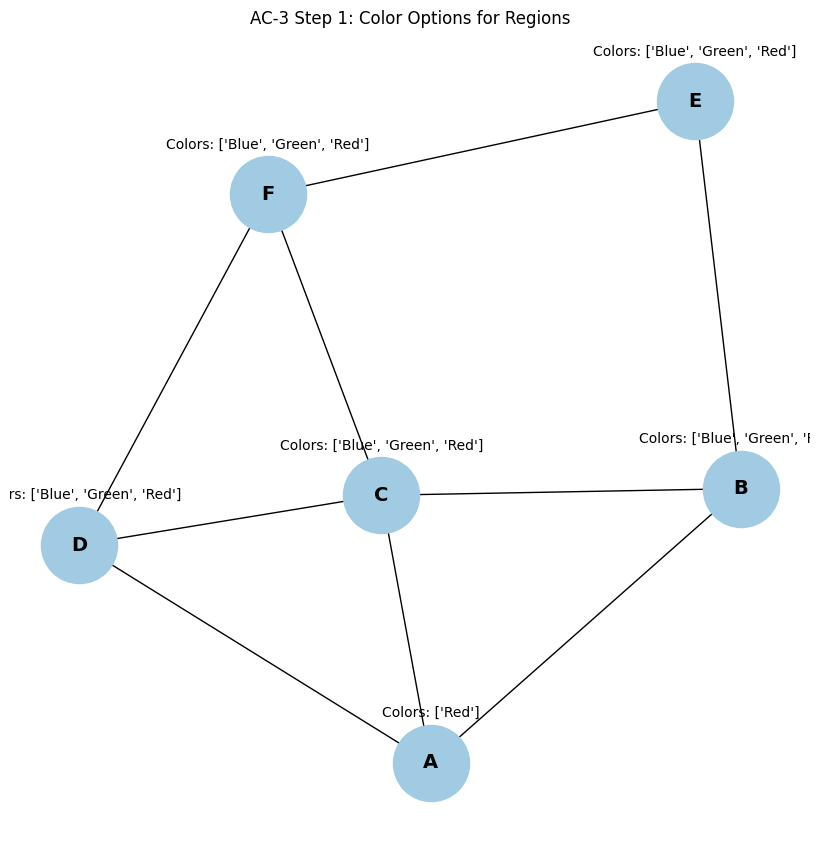


Domains after Step 2:
  A: {'Red'}
  B: {'Green', 'Red', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


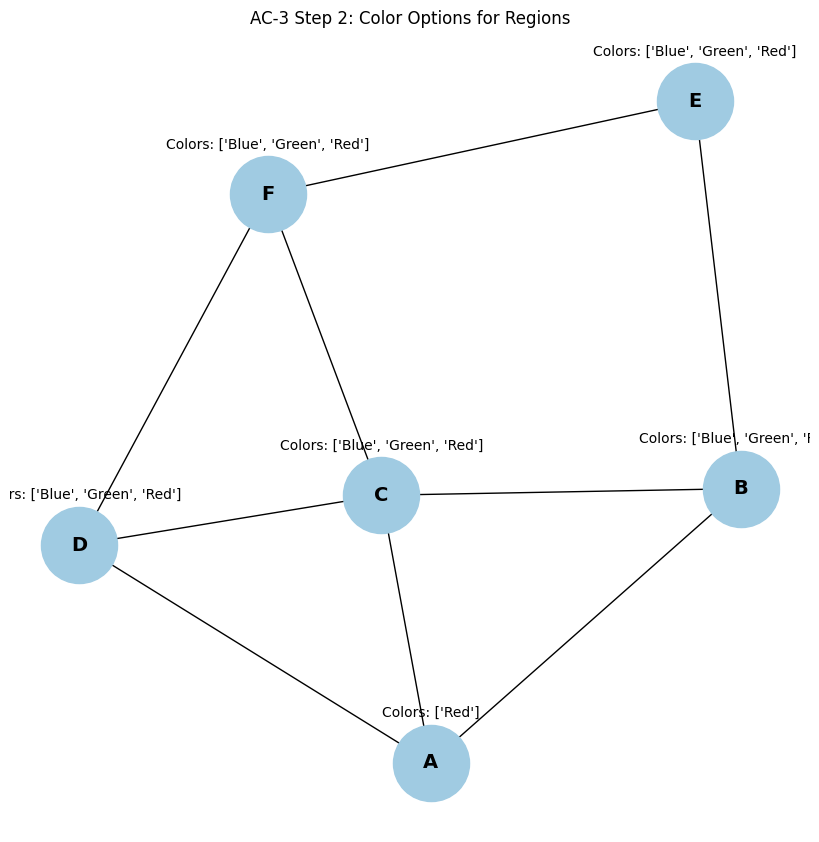


Domains after Step 3:
  A: {'Red'}
  B: {'Green', 'Red', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


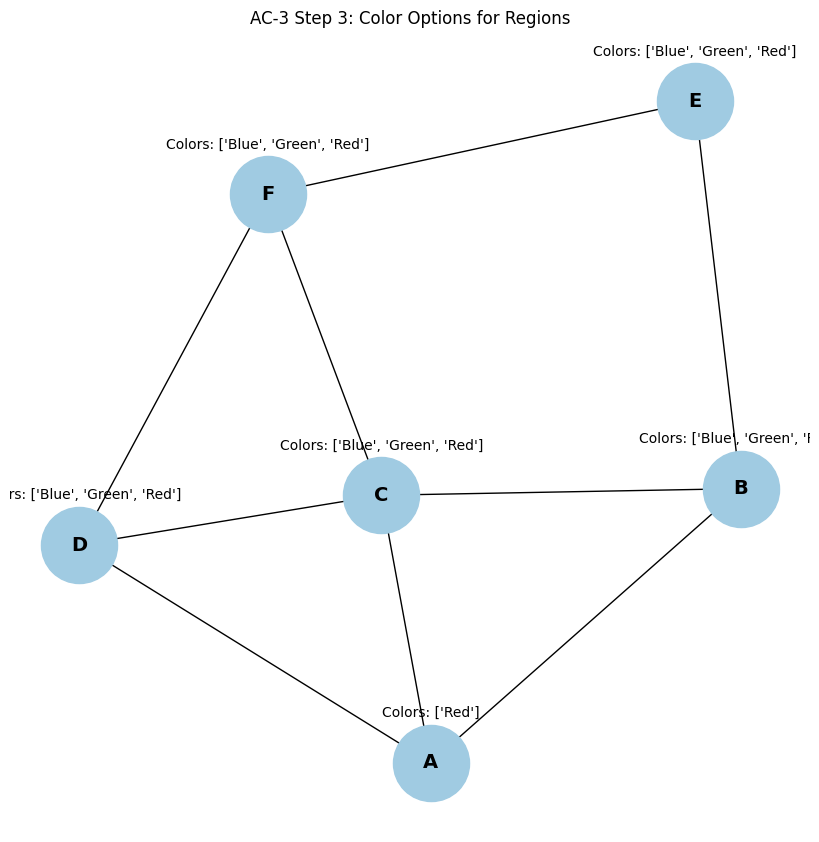


Domains after Step 4:
  A: {'Red'}
  B: {'Green', 'Red', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


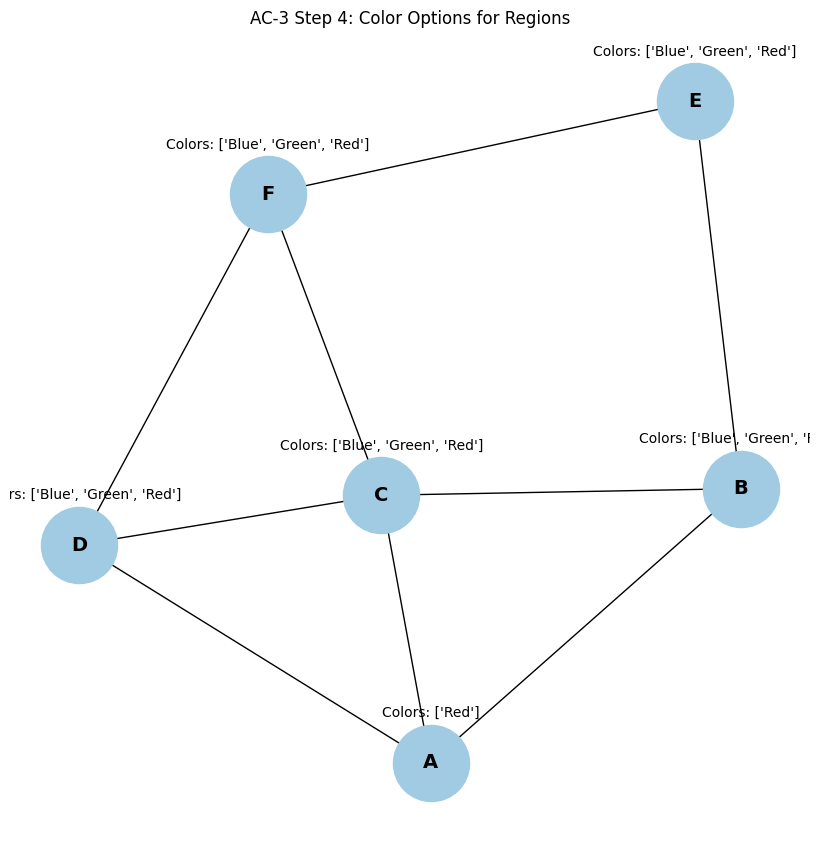


Domains after Step 5:
  A: {'Red'}
  B: {'Green', 'Red', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


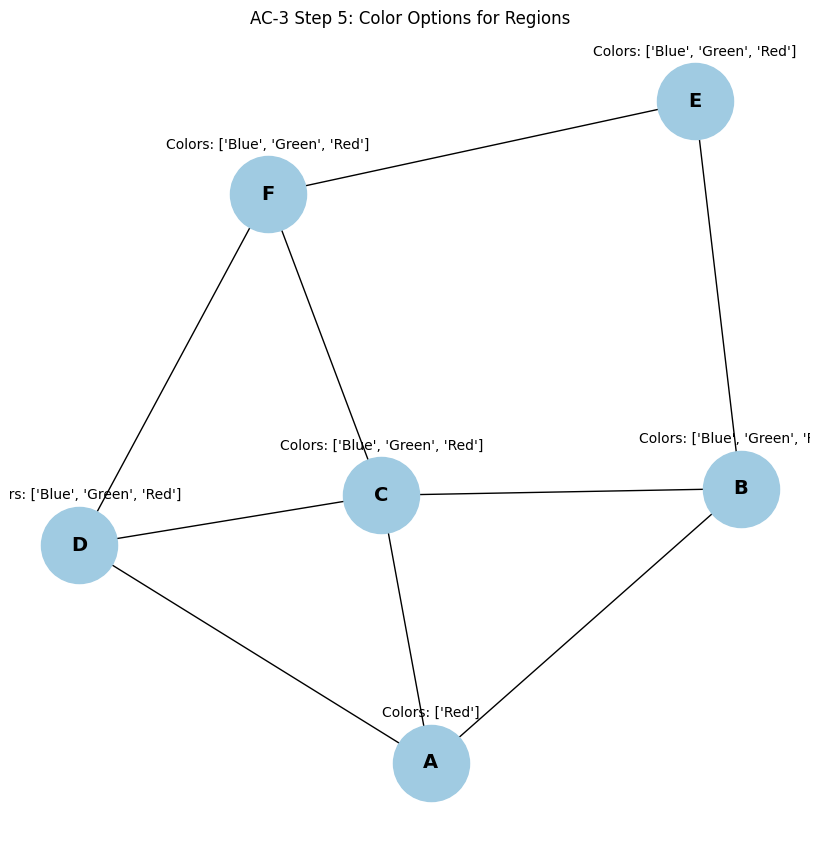


Domains after Step 6:
  A: {'Red'}
  B: {'Green', 'Red', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


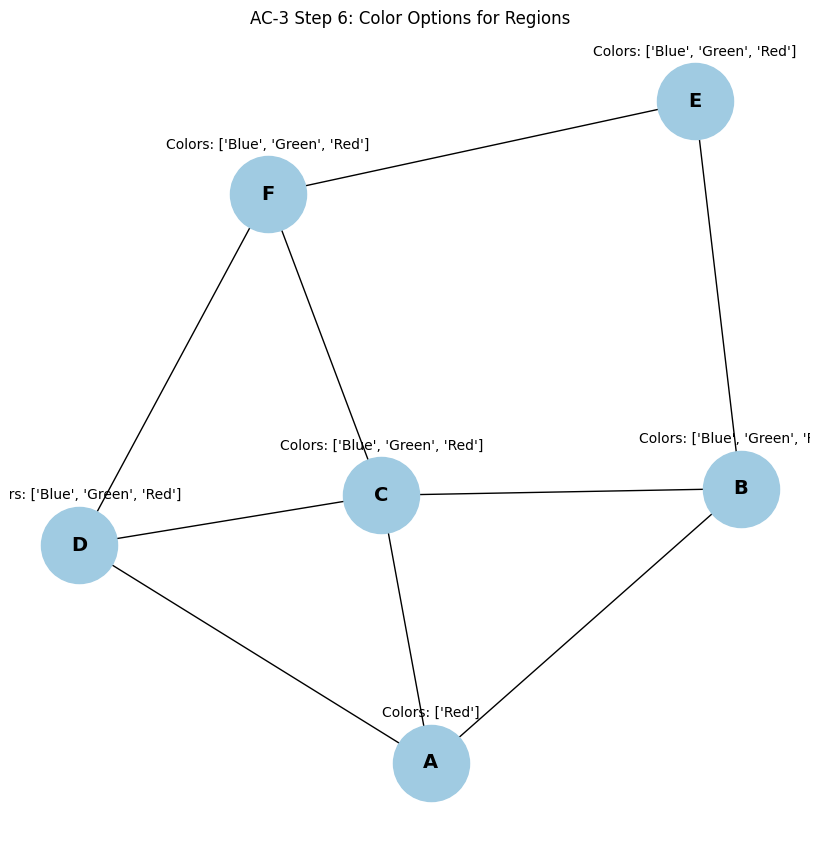


Domains after Step 7:
  A: {'Red'}
  B: {'Green', 'Red', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


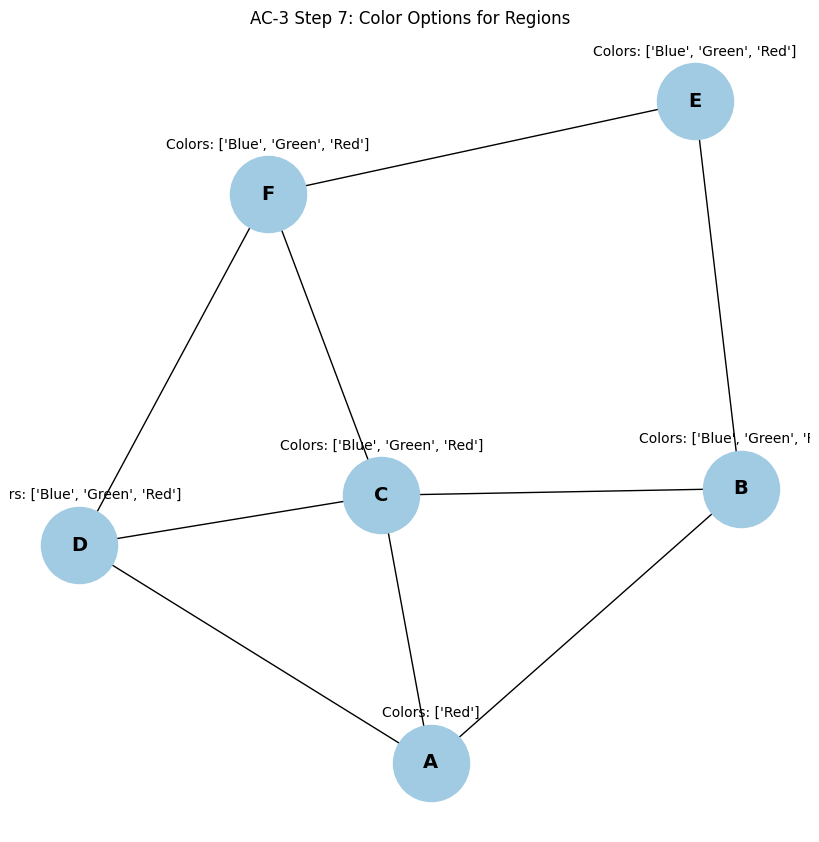


Domains after Step 8:
  A: {'Red'}
  B: {'Green', 'Red', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


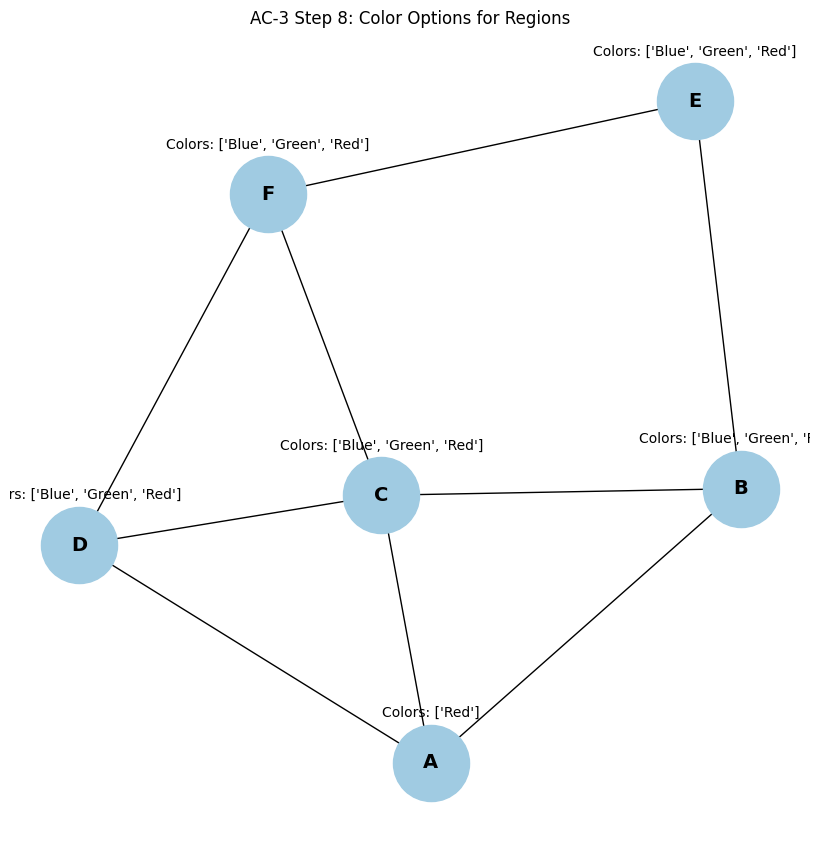


Domains after Step 9:
  A: {'Red'}
  B: {'Green', 'Red', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


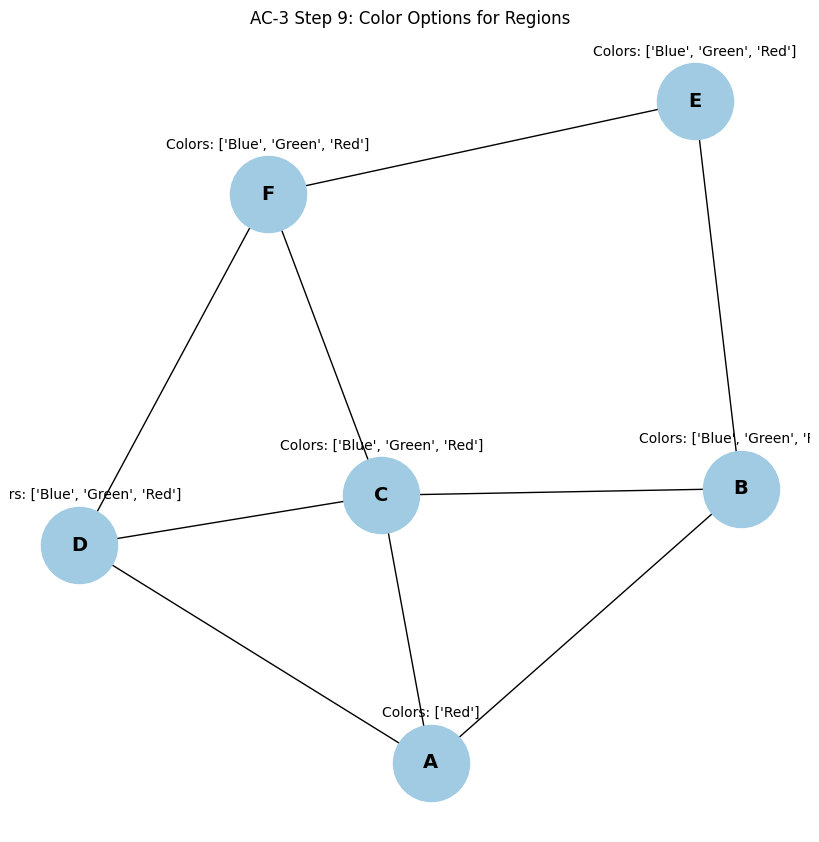


Domains after Step 10:
  A: {'Red'}
  B: {'Green', 'Red', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


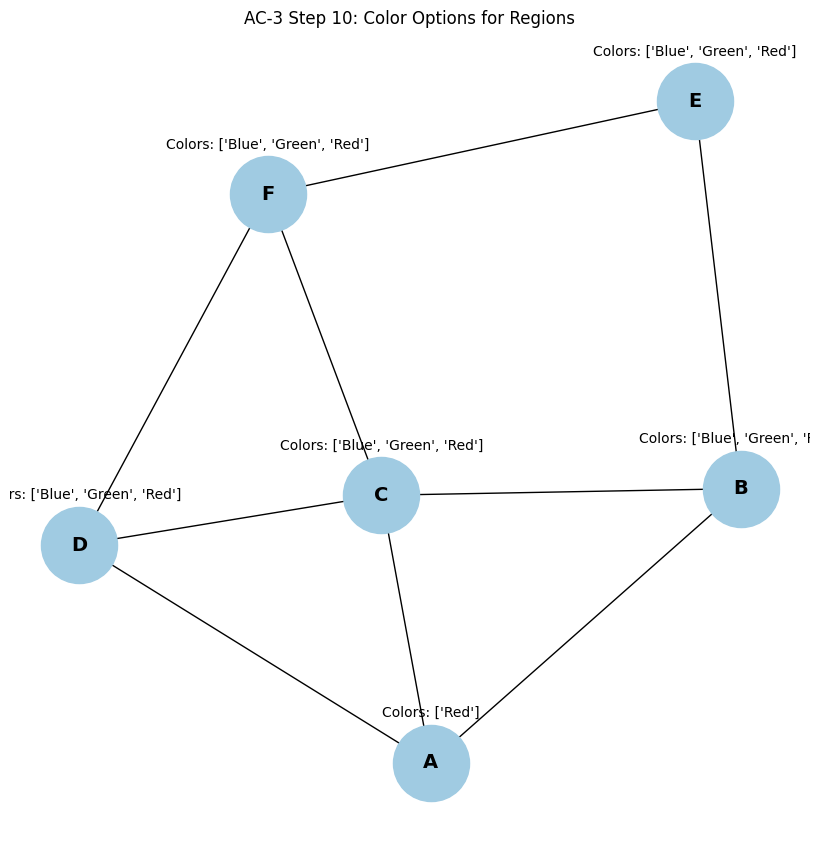

Removed 'Red' from domain of 'B' because all values in domain of 'A' are equal to 'Red'.

Domains after Step 11:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Red', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


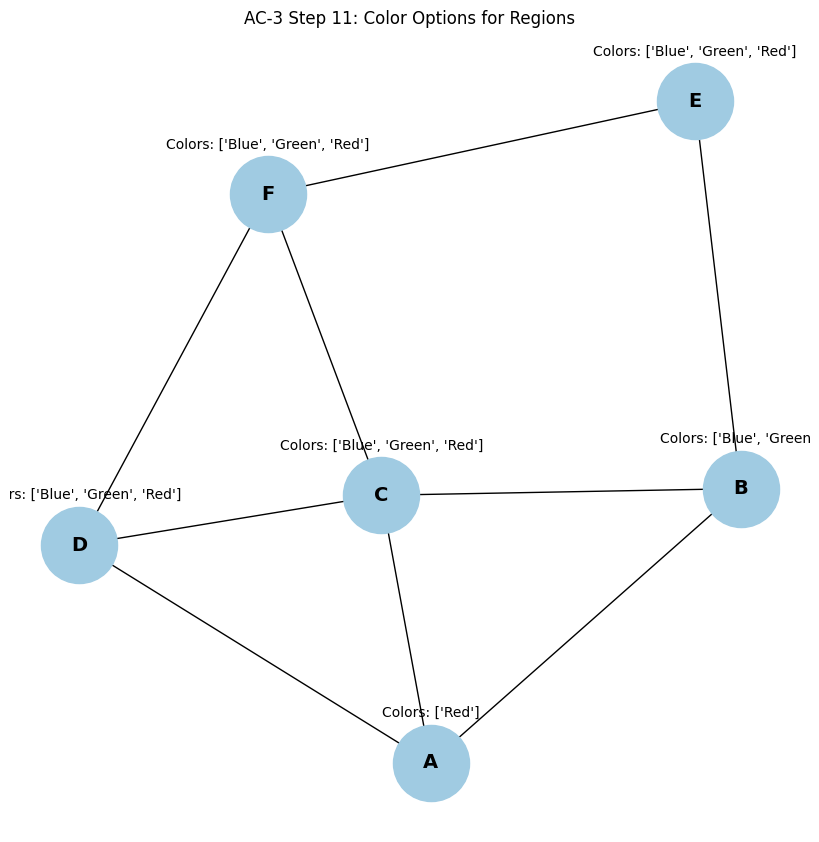

Removed 'Red' from domain of 'C' because all values in domain of 'A' are equal to 'Red'.

Domains after Step 12:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Red', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


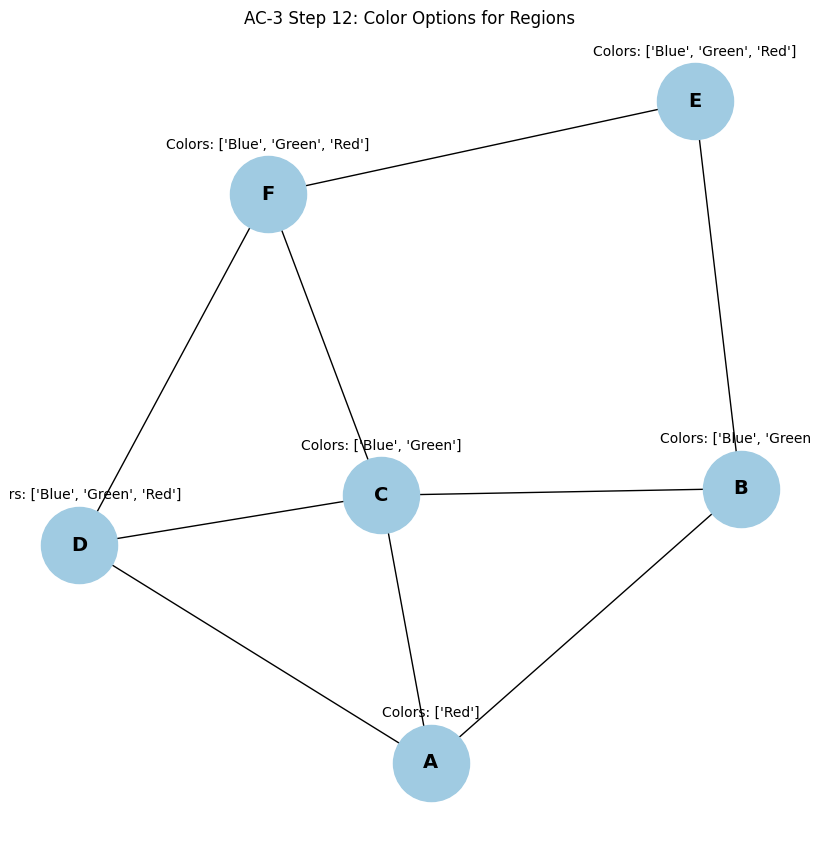

Removed 'Red' from domain of 'D' because all values in domain of 'A' are equal to 'Red'.

Domains after Step 13:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


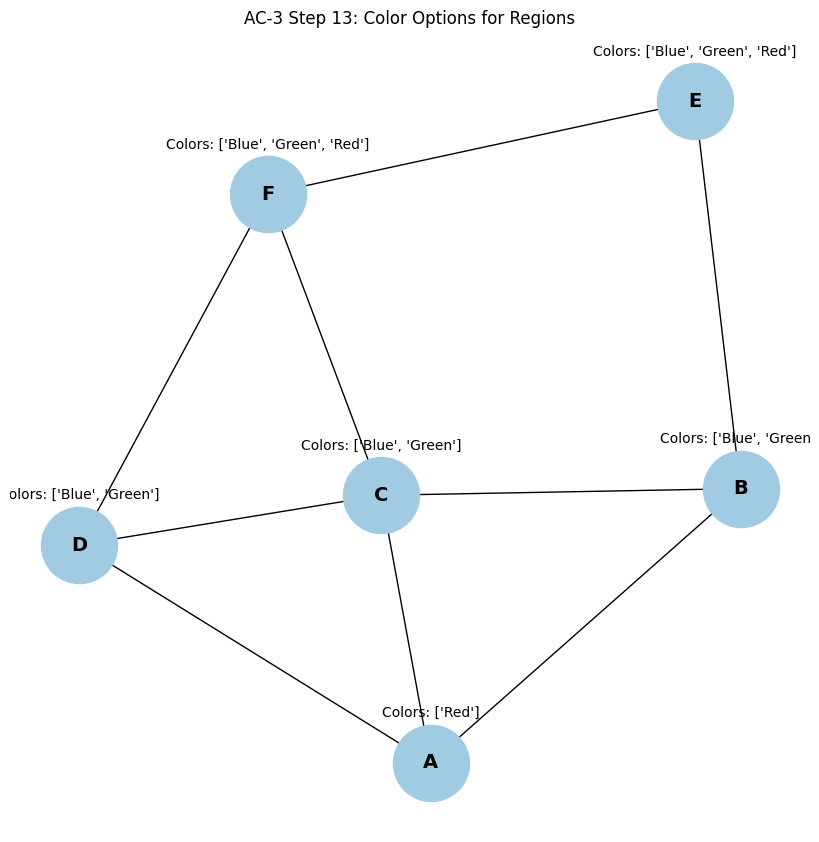


Domains after Step 14:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


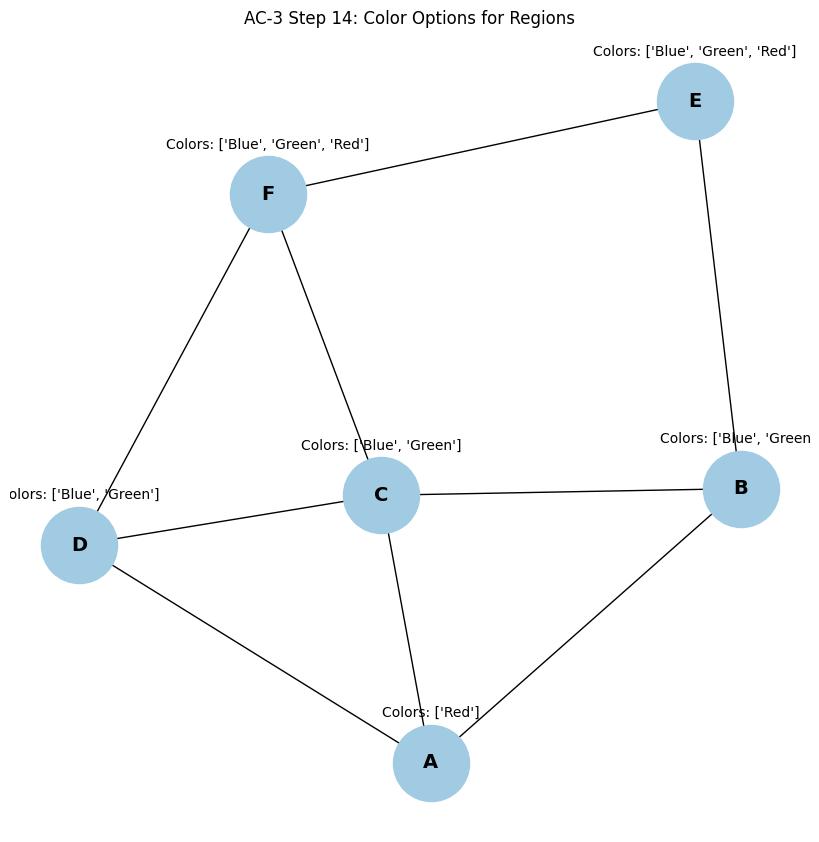


Domains after Step 15:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


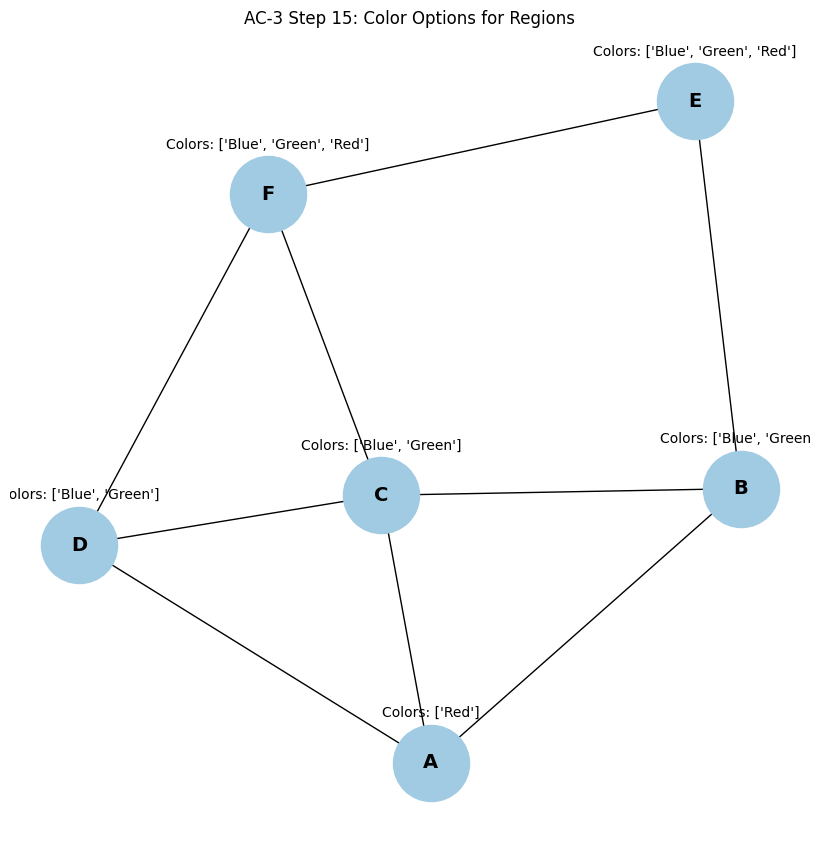


Domains after Step 16:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


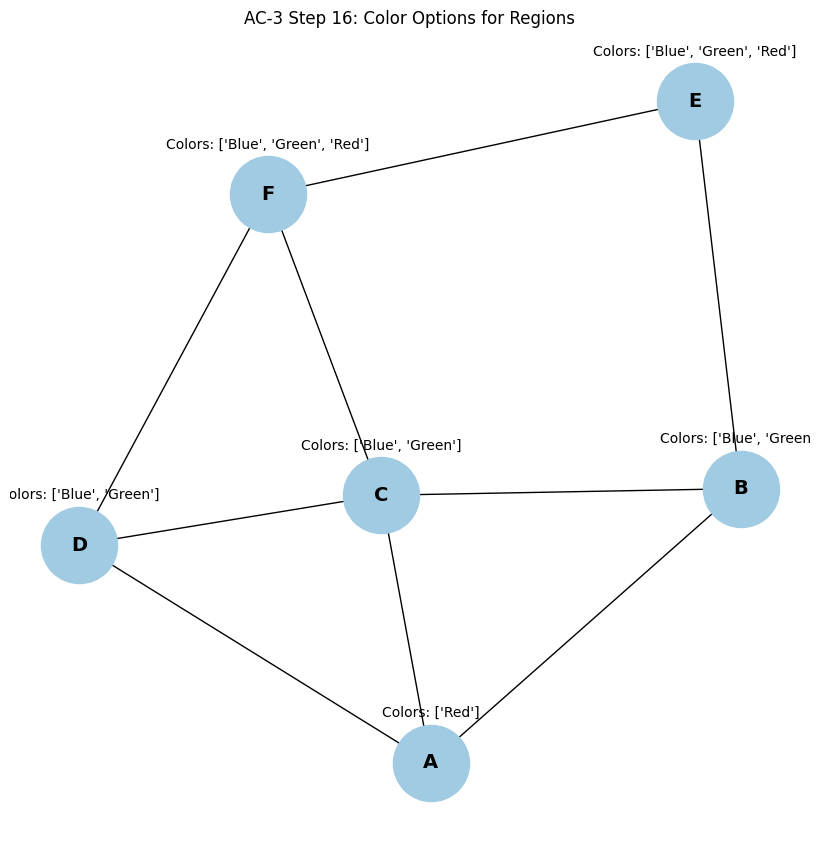


Domains after Step 17:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


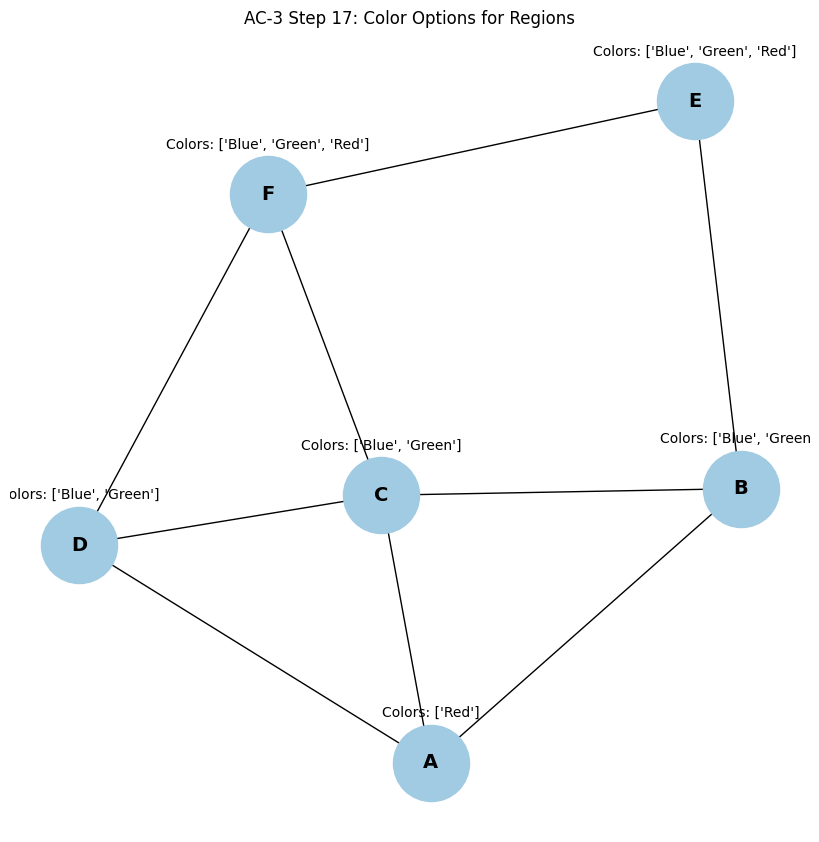


Domains after Step 18:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


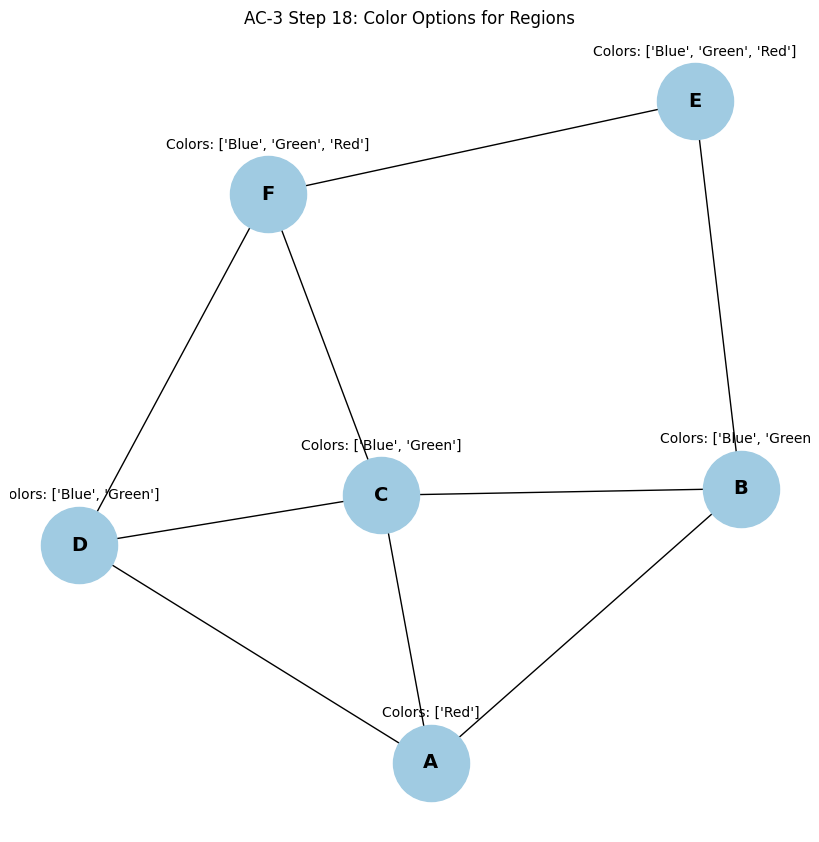


Domains after Step 19:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


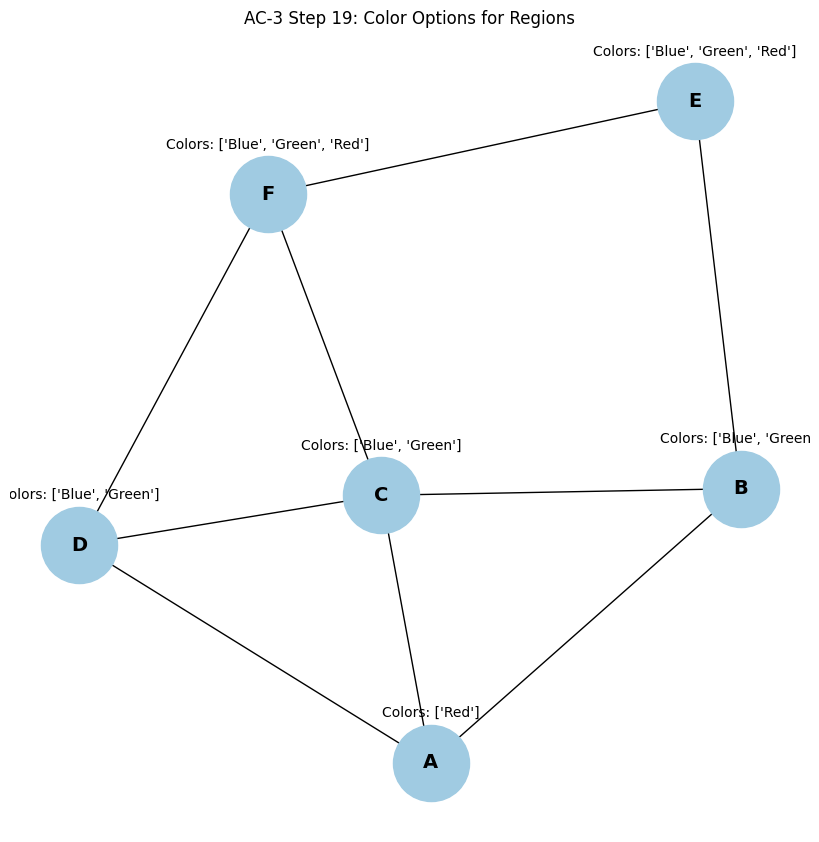


Domains after Step 20:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


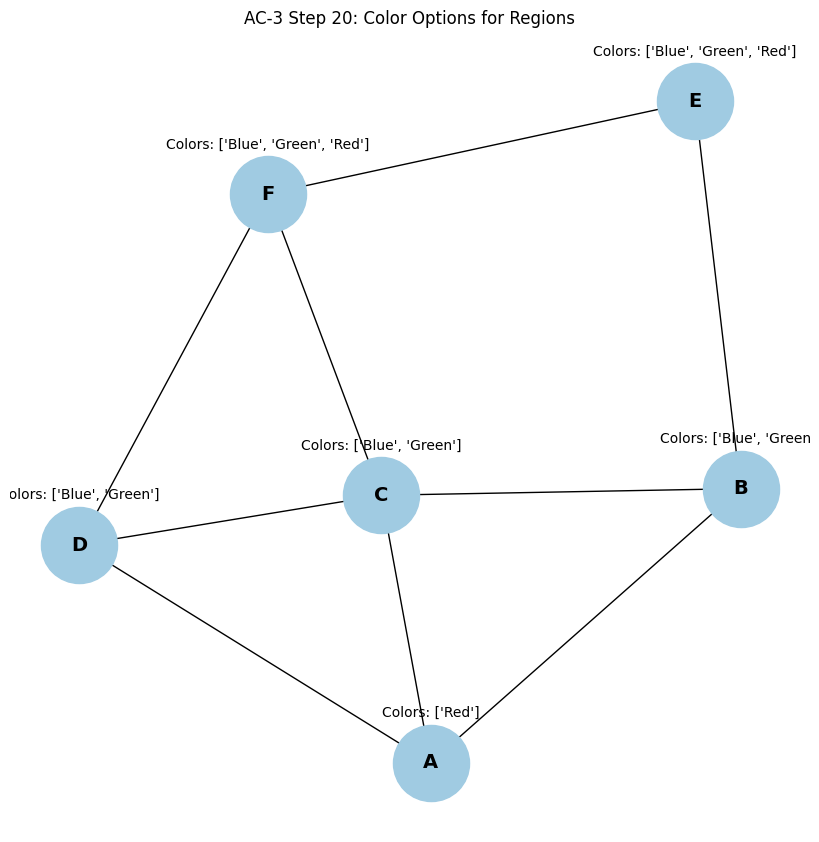


Domains after Step 21:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


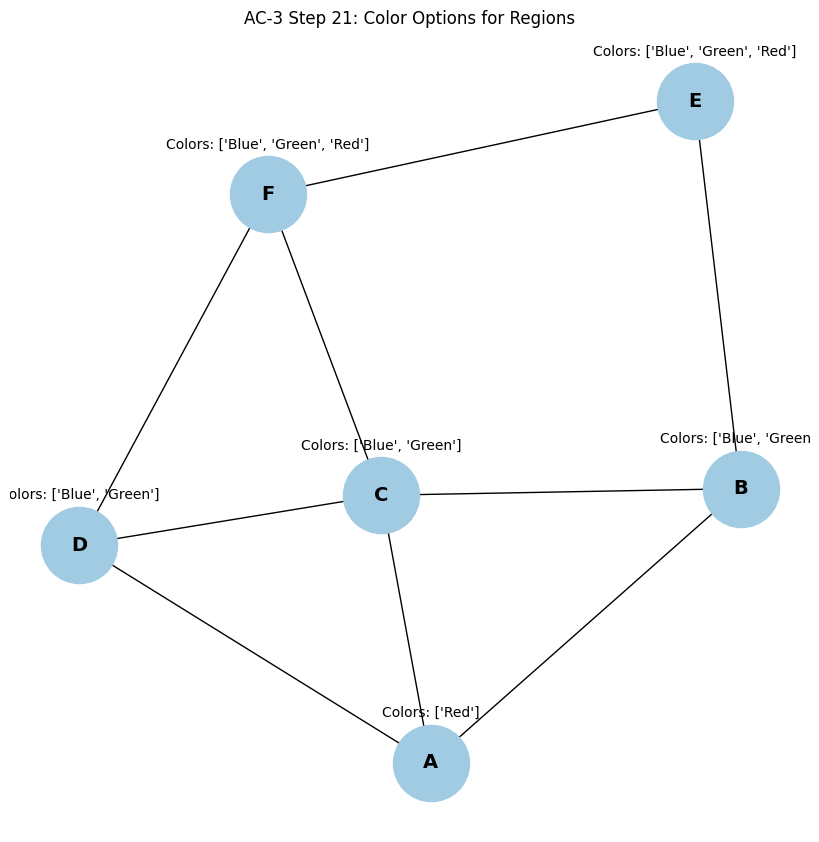


Domains after Step 22:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


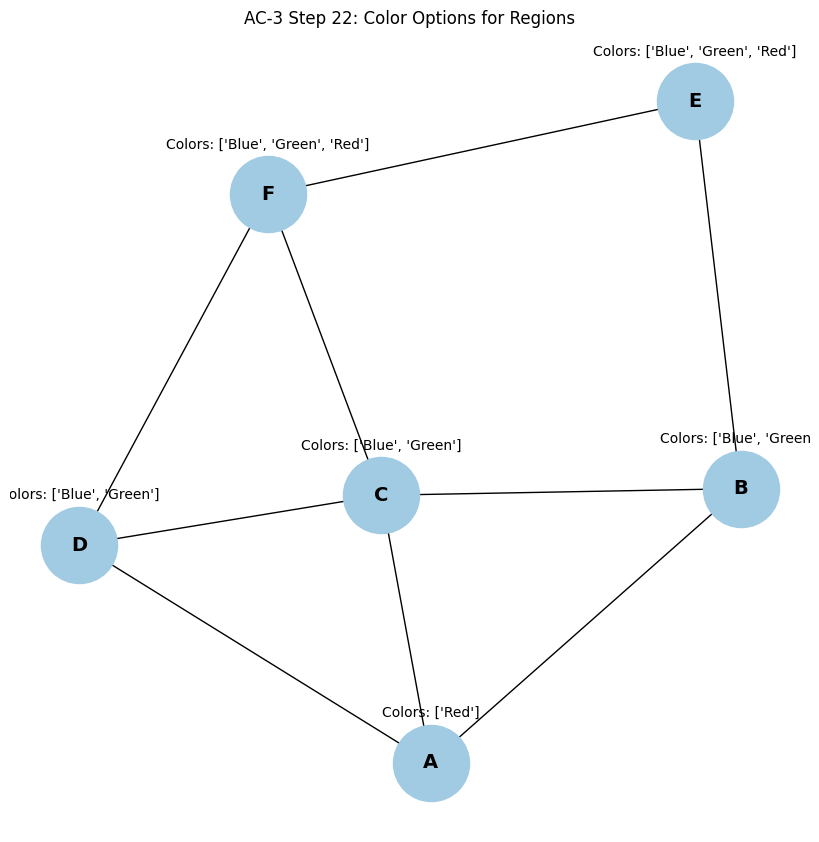


Domains after Step 23:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


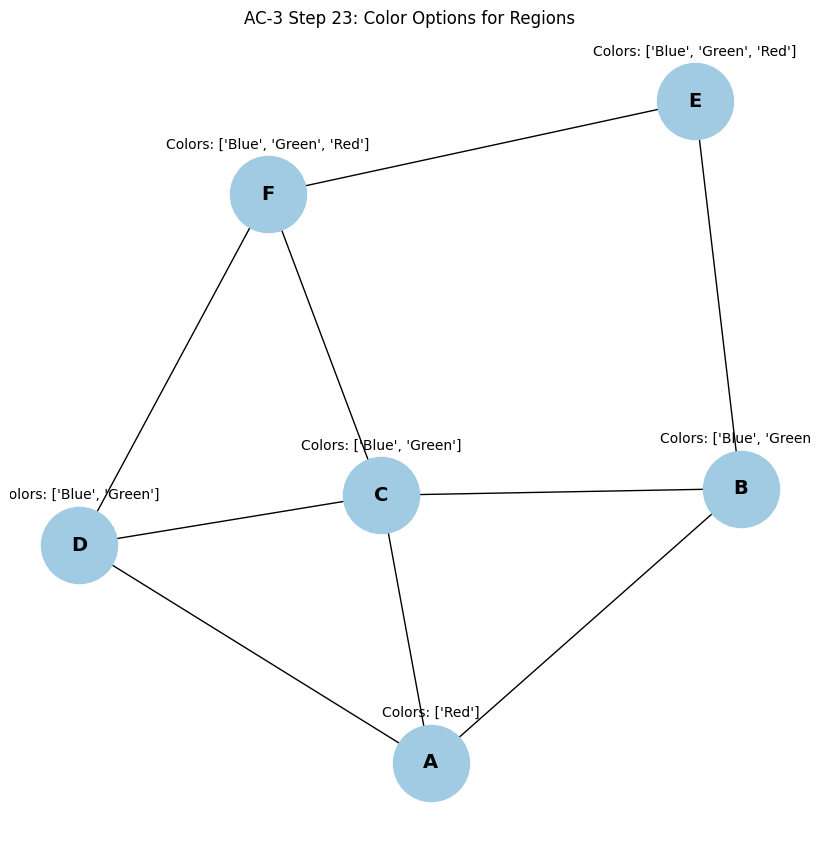


Domains after Step 24:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


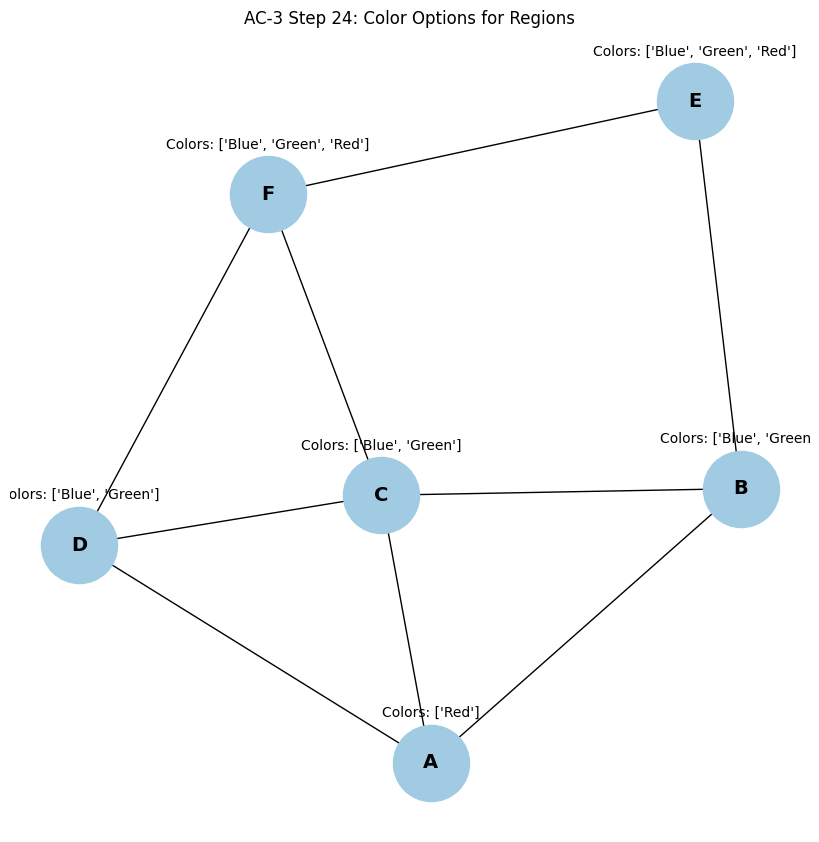


Domains after Step 25:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


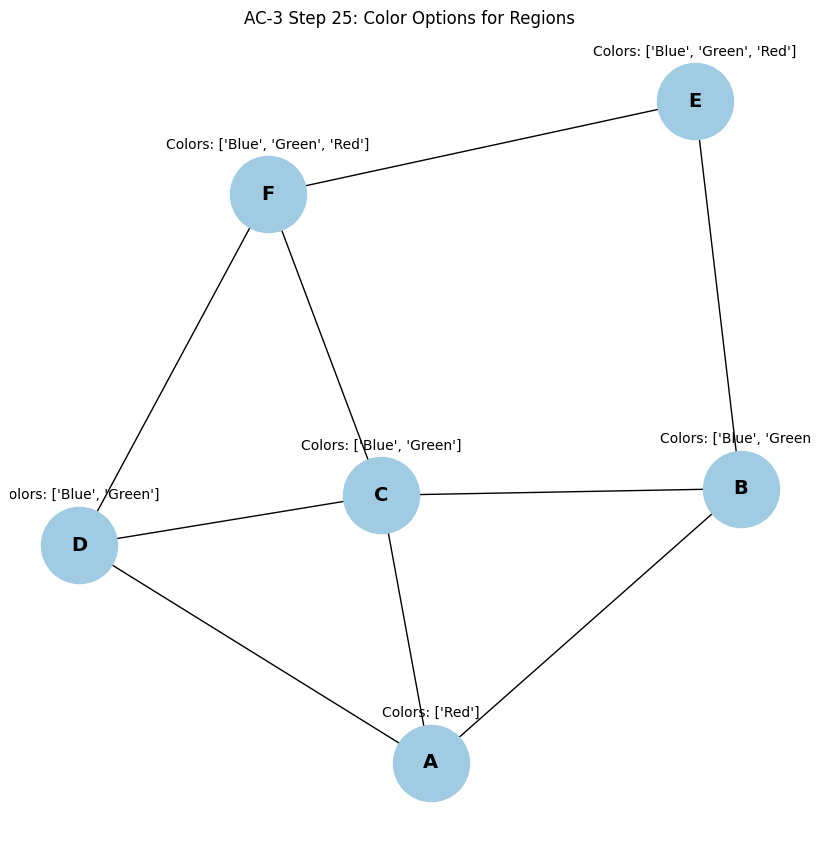


Domains after Step 26:
  A: {'Red'}
  B: {'Green', 'Blue'}
  C: {'Green', 'Blue'}
  D: {'Green', 'Blue'}
  E: {'Green', 'Red', 'Blue'}
  F: {'Green', 'Red', 'Blue'}


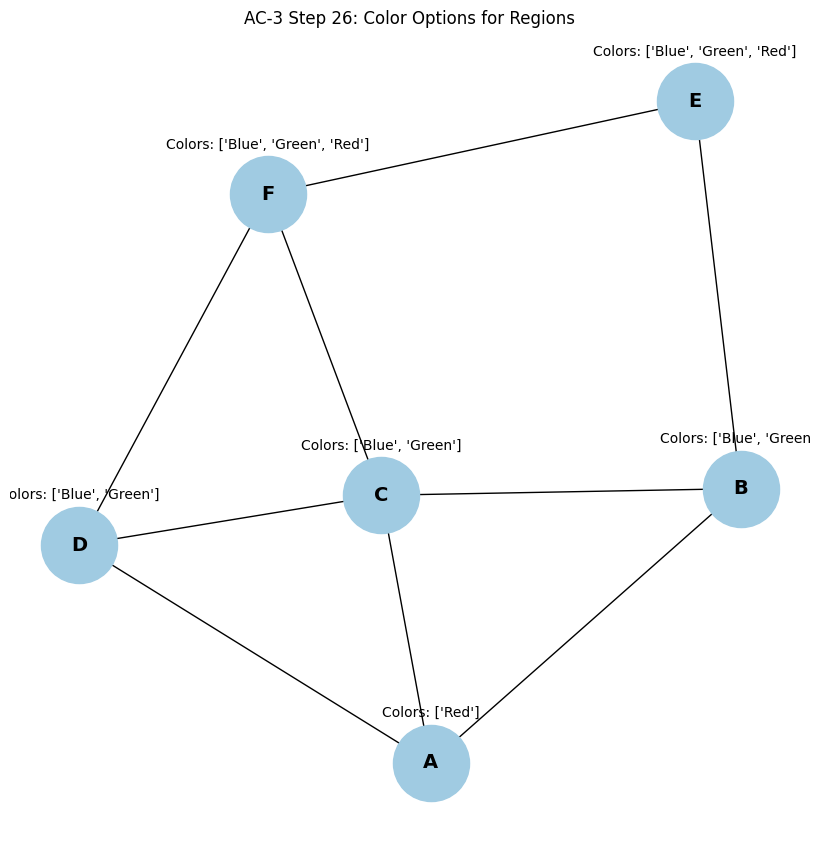

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the map coloring problem (6 regions)
G = nx.Graph()
edges = [
    ('A', 'B'),
    ('A', 'C'),
    ('A', 'D'),
    ('B', 'C'),
    ('B', 'E'),
    ('C', 'D'),
    ('C', 'F'),
    ('D', 'F'),
    ('E', 'F')
]
G.add_edges_from(edges)

# Initialize domains (available colors) for each region
domains = {
    'A': {'Red'},  # Initial assignment: 'A' is 'Red'
    'B': {'Red', 'Green', 'Blue'},
    'C': {'Red', 'Green', 'Blue'},
    'D': {'Red', 'Green', 'Blue'},
    'E': {'Red', 'Green', 'Blue'},
    'F': {'Red', 'Green', 'Blue'}
}

# Step 2: Visualize map coloring and domains, with adjusted label positions
def visualize_map_coloring(step, domains):
    # Use spring layout with increased spacing between nodes
    pos = nx.spring_layout(G, seed=42, k=1.0)
    plt.figure(figsize=(8, 8))

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='#A0CBE2', node_size=3000, font_size=14, font_weight='bold')

    # Create labels showing the current domains (available colors)
    labels = {node: f"Colors: {sorted(domains[node])}" for node in G.nodes}

    # Adjust label positions to avoid overlap
    label_pos = {node: (coords[0], coords[1] + 0.15) for node, coords in pos.items()}

    # Draw labels at the adjusted positions
    nx.draw_networkx_labels(G, label_pos, labels=labels, font_color='black', font_size=10)

    plt.title(f"AC-3 Step {step}: Color Options for Regions")
    plt.show()

# Step 3: Simulate AC-3 algorithm to propagate color constraints (map coloring problem)
def arc_consistency_map_coloring():
    step = 1
    # Initialize arcs as a queue of all edges in both directions
    arcs = [(u, v) for u, v in G.edges()] + [(v, u) for u, v in G.edges()]

    visualize_map_coloring(step, domains)  # Initial visualization

    while arcs:
        (Xi, Xj) = arcs.pop(0)
        revised = False

        # For each value in Xi's domain, check if it's consistent with Xj's domain
        for x in list(domains[Xi]):  # Use list to avoid modifying the set during iteration
            # If all values in Xj's domain are equal to x, remove x from Xi's domain
            if all(x == y for y in domains[Xj]):
                domains[Xi].remove(x)
                revised = True
                print(f"Removed '{x}' from domain of '{Xi}' because all values in domain of '{Xj}' are equal to '{x}'.")

        if revised:
            # If Xi's domain was revised, add arcs (Xk, Xi) back to the queue
            for neighbor in G.neighbors(Xi):
                if neighbor != Xj:
                    arcs.append((neighbor, Xi))

        # Check for empty domains
        if not domains[Xi]:
            print(f"Domain of '{Xi}' is empty. No solution possible with current assignments.")
            break

        step += 1
        print(f"\nDomains after Step {step}:")
        for node in domains:
            print(f"  {node}: {domains[node]}")
        visualize_map_coloring(step, domains)  # Visualize after each revision

# Step 4: Run the AC-3 algorithm for map coloring
arc_consistency_map_coloring()




---

# **Forward Checking Code**

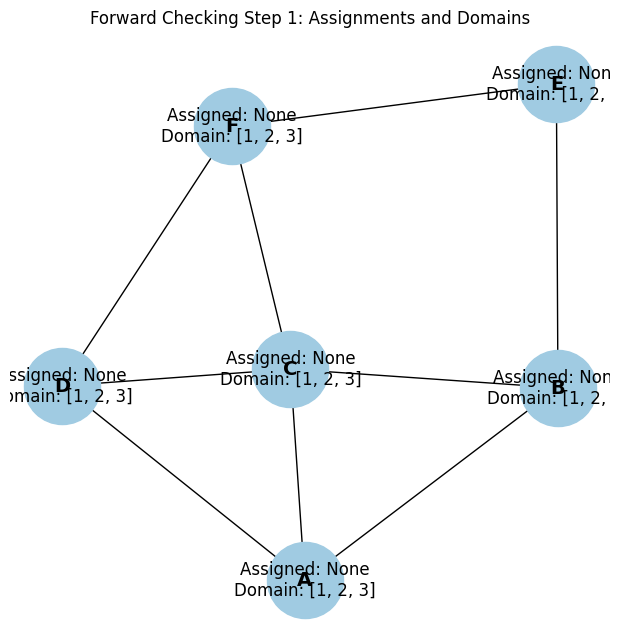

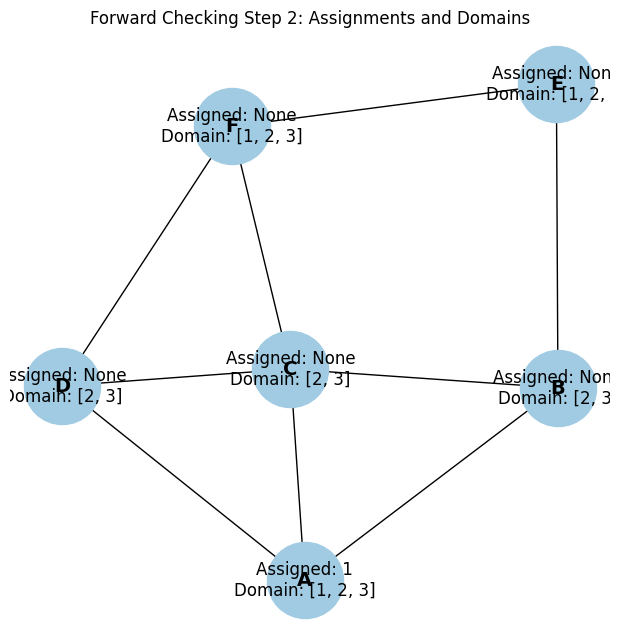

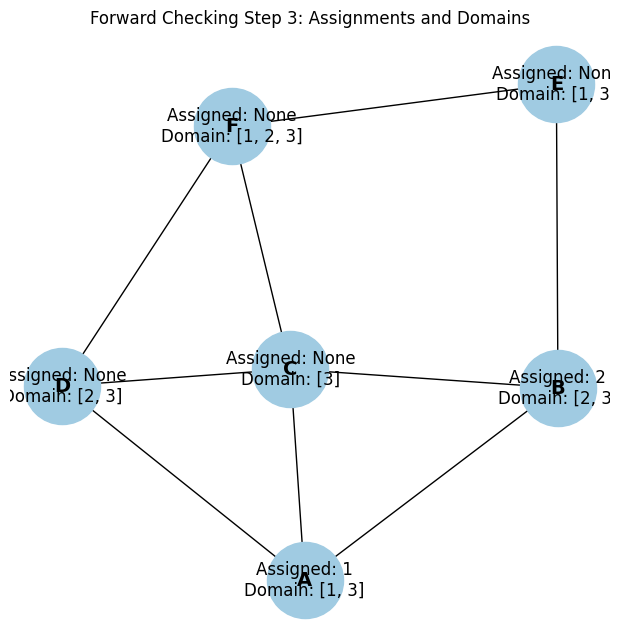

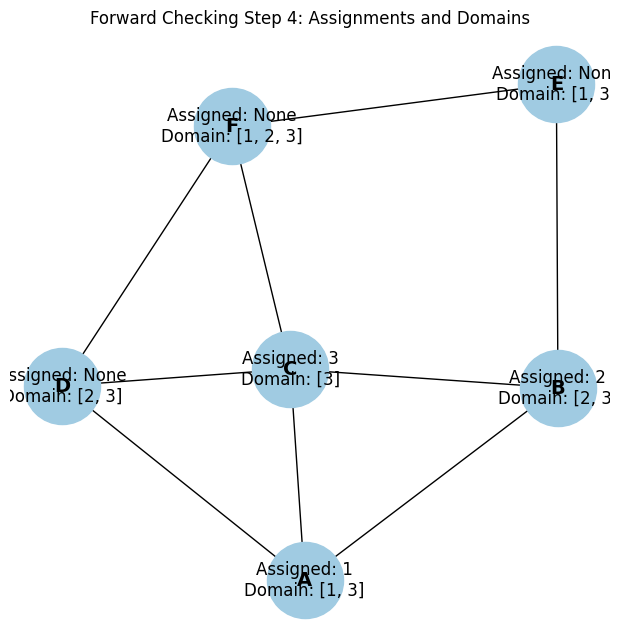

In [ ]:
# Install necessary libraries if needed
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define a simple graph for demonstration (6 regions)
G = nx.Graph()
edges = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'E'), ('C', 'D'), ('C', 'F'), ('D', 'F'), ('E', 'F')]
G.add_edges_from(edges)

# Initialize domains (available colors) for each region
domains = {
    'A': {1, 2, 3},  # Domain of region A
    'B': {1, 2, 3},
    'C': {1, 2, 3},
    'D': {1, 2, 3},
    'E': {1, 2, 3},
    'F': {1, 2, 3}
}

# Step 2: Visualize assignments and domain reductions after forward checking
def visualize_forward_checking(step, domains, assignment):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(6, 6))

    # Create labels showing the current assignment and remaining domains
    labels = {node: f"Assigned: {assignment.get(node, 'None')}\nDomain: {sorted(domains[node])}" for node in G.nodes}

    nx.draw(G, pos, with_labels=True, node_color='#A0CBE2', node_size=3000, font_size=14, font_weight='bold')
    nx.draw_networkx_labels(G, pos, labels=labels, font_color='black')
    plt.title(f"Forward Checking Step {step}: Assignments and Domains")
    plt.show()

# Step 3: Forward checking function that assigns values and prunes domains
def forward_checking():
    step = 1
    assignment = {}

    visualize_forward_checking(step, domains, assignment)  # Initial state

    # Assign a value to region A and reduce the domains of neighbors
    assignment['A'] = 1
    step += 1
    for neighbor in G.neighbors('A'):
        if 1 in domains[neighbor]:
            domains[neighbor].remove(1)  # Forward checking: Remove 1 from neighbors' domains

    visualize_forward_checking(step, domains, assignment)  # After assigning and pruning

    # Assign a value to region B and reduce the domains of its neighbors
    assignment['B'] = 2
    step += 1
    for neighbor in G.neighbors('B'):
        if 2 in domains[neighbor]:
            domains[neighbor].remove(2)  # Forward checking: Remove 2 from neighbors' domains

    visualize_forward_checking(step, domains, assignment)  # After second assignment

    # Assign a value to region C
    assignment['C'] = 3
    step += 1
    visualize_forward_checking(step, domains, assignment)  # Final state

# Step 4: Run forward checking and visualize the propagation
forward_checking()
